<a href="https://colab.research.google.com/github/DinaZakaria/Credit-Card-Segmentation/blob/master/ML2_Project_V04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Imports

In [11]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.7 MB/s 


In [323]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, normalize
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA, KernelPCA
from sklearn_extra.cluster import KMedoids
import scipy.cluster.hierarchy as shc
from scipy.spatial import distance 
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

## 01. Github Clonning 

In [210]:
!git clone https://github.com/DinaZakaria/Credit-Card-Segmentation.git

fatal: destination path 'Credit-Card-Segmentation' already exists and is not an empty directory.


In [328]:
# read path of data csv file 
CC_data  = pd.read_csv("Credit-Card-Segmentation/CC GENERAL.csv")

# 1. EDA and Data Preprocessing 


> ## 1.1. Explore Data

In [329]:
CC_data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [330]:
# Data types
CC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [331]:
# basic statitics for numerical columns
CC_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [332]:
# Check for null values
CC_data.isnull().sum().sort_values(ascending=False)


MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [333]:
CC_data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

MINIMUM_PAYMENTS contains 313 null values and CREDIT_LIMIT contains 1 null value

In [334]:
# Check for duplicates 
CC_data.duplicated().sum()

0

There is no duplicates

In [335]:
# Check for skewness
CC_data.skew(skipna = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

> ### 1.1.1. Data Visualization 

In [336]:
# exclude object column 
vis_col = CC_data.select_dtypes(exclude=['object']).columns.to_list()
vis_col

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

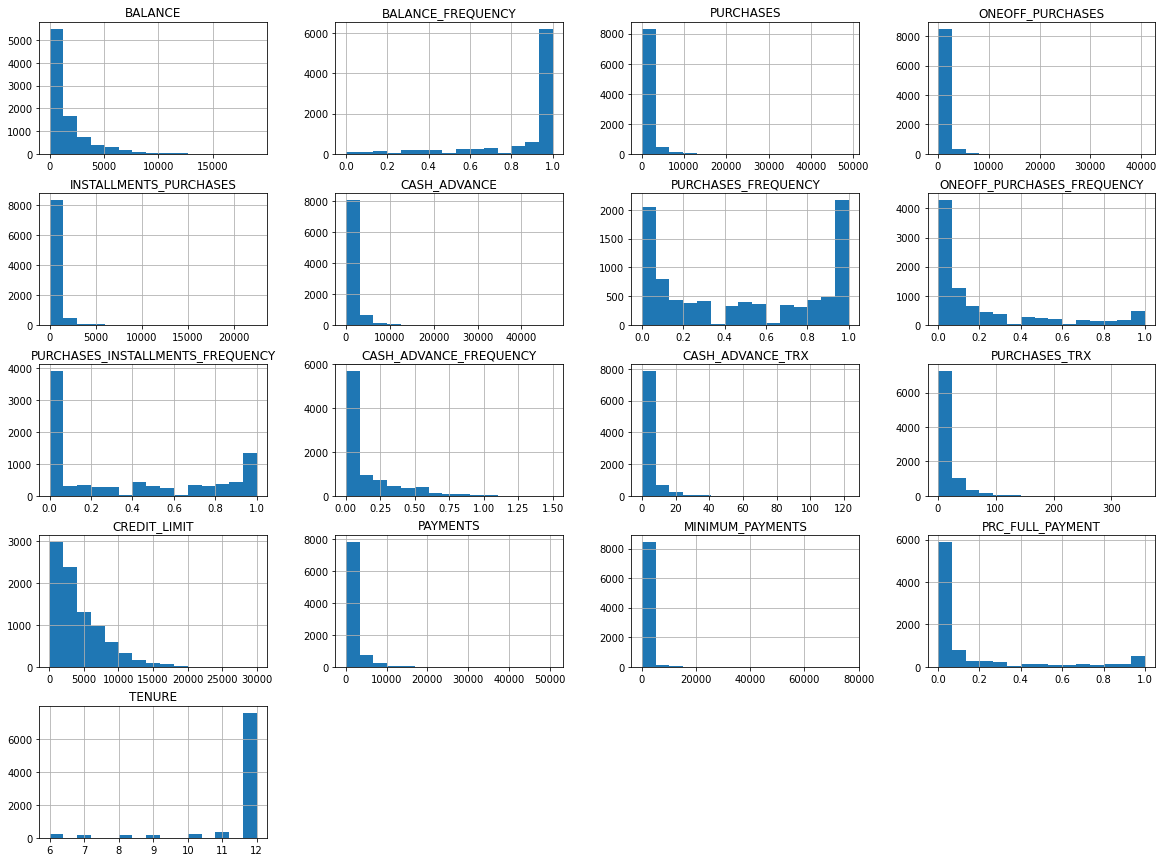

In [337]:
# Histogram 
CC_data[vis_col].hist(bins=15, figsize=(20, 15), layout=(5, 4));


In [338]:
# Check for data skewness
CC_data.skew(skipna = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

> ## 1.2. Data Preprocessing 

>> ### 1.2.1. Remove Nulls 

In [339]:
CC_data.dropna(inplace = True)

In [340]:
# reset index 
CC_data.reset_index(drop = True, inplace=True)

In [341]:
# Checkf for df
CC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

In [342]:
# check for no null values
CC_data.isnull().sum().sort_values(ascending=False)

CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

Since we don't need CUST_ID in our clustering so we can remove it 

In [343]:
CC_data.drop('CUST_ID', axis = 1, inplace = True)

In [344]:
# check for columns 
CC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT

> ### 1.1.2. Heat Map 

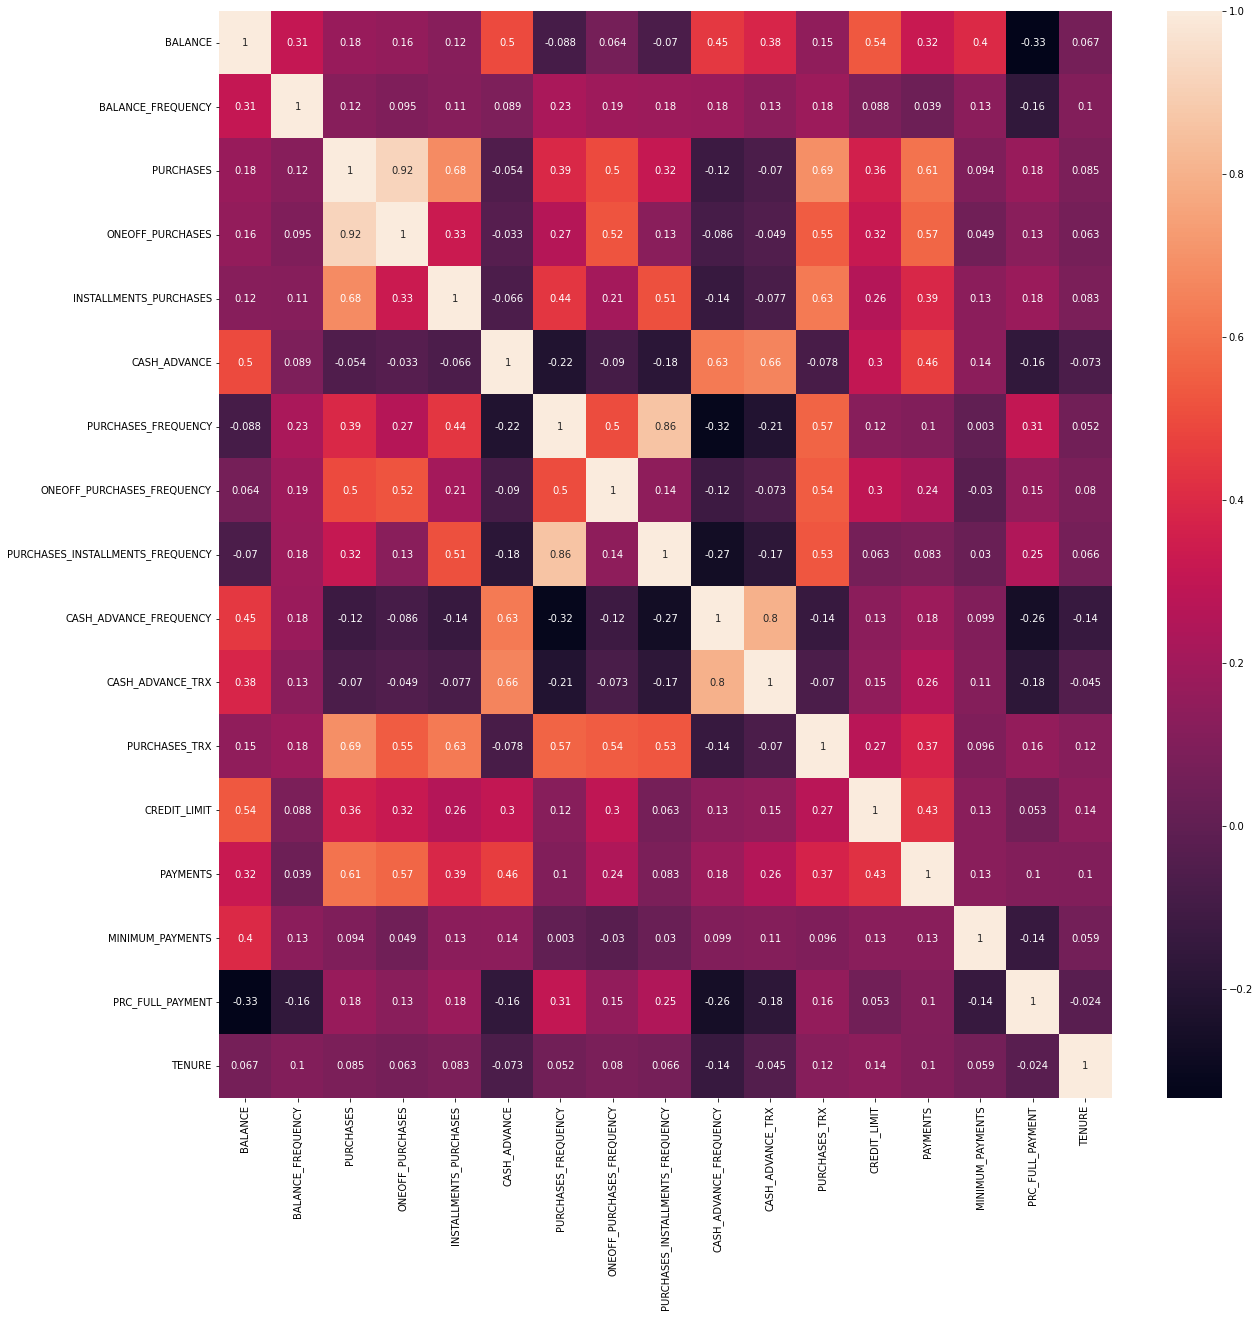

In [345]:
plt.figure(figsize=(20,20))
corr_data = CC_data.corr()
sns.heatmap(corr_data,annot=True)
plt.show()

# Scenario 1

# 2. Data Preparation for Model

> ## 2.1. Data Splitting

In [365]:
CC_df, cc_df_test = train_test_split(CC_data, test_size=0.2, random_state=1)


> ## 2.2.  Scaling and Transform

>>>### 2.2.1. LogTransform 

In [347]:
CC_df_log = CC_df.copy()
columns = CC_df_log.columns
for col in columns:
  CC_df_log [col] = np.log(CC_df_log[col]+1)

In [348]:
CC_df_log.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,6908.0,6.265135,1.892816,0.000000,5.020926,6.814217,7.657024,9.854515
BALANCE_FREQUENCY,6908.0,0.631944,0.126268,0.000000,0.646627,0.693147,0.693147,0.693147
PURCHASES,6908.0,4.915222,2.930826,0.000000,3.651690,5.929523,7.041641,10.800403
ONEOFF_PURCHASES,6908.0,3.245228,3.249118,0.000000,0.000000,3.833509,6.381816,10.615512
INSTALLMENTS_PURCHASES,6908.0,3.367032,3.095139,0.000000,0.000000,4.506895,6.189418,10.021315
CASH_ADVANCE,6908.0,3.378322,3.574130,0.000000,0.000000,0.000000,7.053224,10.284766
PURCHASES_FREQUENCY,6908.0,0.362595,0.277490,0.000000,0.080042,0.405465,0.650588,0.693147
ONEOFF_PURCHASES_FREQUENCY,6908.0,0.160627,0.216962,0.000000,0.000000,0.080042,0.287682,0.693147
PURCHASES_INSTALLMENTS_FREQUENCY,6908.0,0.270864,0.282062,0.000000,0.000000,0.154151,0.559616,0.693147
CASH_ADVANCE_FREQUENCY,6908.0,0.116043,0.158147,0.000000,0.000000,0.000000,0.223144,0.916291


>>> #### 1.2.2.2. StandardScaler -> scaling to unit variance   





In [349]:
CC_df_std = CC_df.copy()
columns = CC_df_std.columns
features = CC_df_std[columns]
CC_df_std[columns] = StandardScaler().fit_transform(features.values)


In [350]:
CC_df_std.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,6908.0,-1.110866e-16,1.000072,-0.762899,-0.691134,-0.329262,0.245018,8.314570
BALANCE_FREQUENCY,6908.0,2.674307e-17,1.000072,-4.307755,0.068102,0.505688,0.505688,0.505688
PURCHASES,6908.0,-2.160017e-17,1.000072,-0.465606,-0.448552,-0.295264,0.053297,21.811908
ONEOFF_PURCHASES,6908.0,-5.142898e-17,1.000072,-0.351703,-0.351703,-0.325377,-0.008253,23.376172
INSTALLMENTS_PURCHASES,6908.0,-9.257216e-18,1.000072,-0.455811,-0.455811,-0.358768,0.070934,23.902307
CASH_ADVANCE,6908.0,-1.645727e-17,1.000072,-0.486851,-0.486851,-0.486851,0.078969,13.850856
PURCHASES_FREQUENCY,6908.0,1.202152e-16,1.000072,-1.226317,-1.018751,0.019085,1.056920,1.264486
ONEOFF_PURCHASES_FREQUENCY,6908.0,-3.317169e-17,1.000072,-0.685543,-0.685543,-0.406627,0.430124,2.661461
PURCHASES_INSTALLMENTS_FREQUENCY,6908.0,2.365733e-17,1.000072,-0.919423,-0.919423,-0.500237,0.966913,1.595691
CASH_ADVANCE_FREQUENCY,6908.0,-3.240026e-17,1.000072,-0.683697,-0.683697,-0.683697,0.552341,6.732530


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed018d9490>,
      dtype=object)

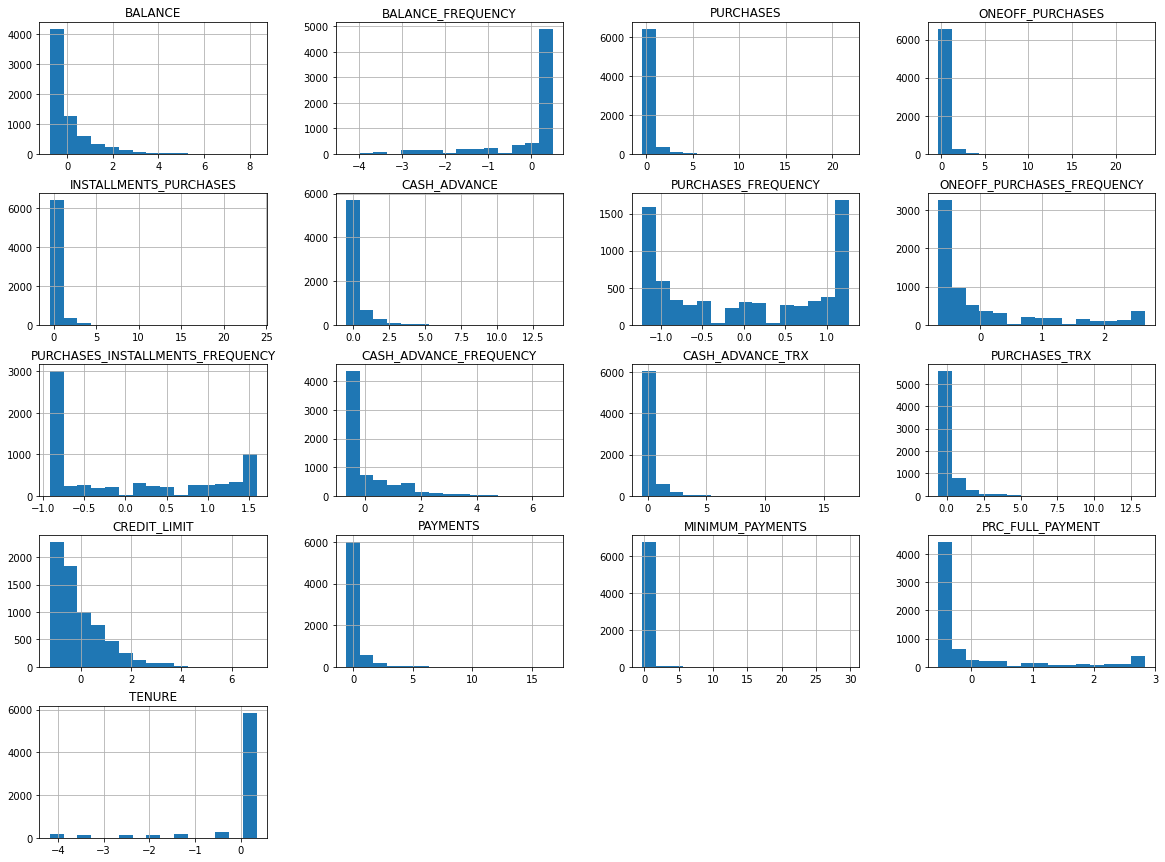

In [351]:
# Histogram 
CC_df_std[columns].hist(bins=15, figsize=(20, 15), layout=(5, 4))

>>> #### 1.2.2.3. RobustScaler -> standardization to a unit value of a robust variance estimator 

In [352]:
CC_df_robust = CC_df.copy()
columns = CC_df_robust.columns
features = CC_df_robust[columns]
CC_df_robust[columns] = RobustScaler().fit_transform(features.values)


In [353]:
CC_df_robust.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,6908.0,0.351719,1.068281,-0.463212,-0.386553,2.894820e-17,0.613447,9.233370
BALANCE_FREQUENCY,6908.0,-1.155632,2.285434,-11.000011,-1.000000,0.000000e+00,0.000000,0.000000
PURCHASES,6908.0,0.588351,1.992775,-0.339429,-0.305448,-2.572947e-17,0.694552,44.051420
ONEOFF_PURCHASES,6908.0,0.947378,2.911844,-0.076653,-0.076653,0.000000e+00,0.923347,69.010212
INSTALLMENTS_PURCHASES,6908.0,0.681104,1.898592,-0.184231,-0.184231,0.000000e+00,0.815769,46.058543
CASH_ADVANCE,6908.0,0.860434,1.767474,0.000000,0.000000,0.000000e+00,1.000000,25.339697
PURCHASES_FREQUENCY,6908.0,-0.009194,0.481807,-0.600000,-0.500000,0.000000e+00,0.500000,0.600000
ONEOFF_PURCHASES_FREQUENCY,6908.0,0.364470,0.896390,-0.249999,-0.249999,0.000000e+00,0.750001,2.750004
PURCHASES_INSTALLMENTS_FREQUENCY,6908.0,0.265190,0.530167,-0.222223,-0.222223,0.000000e+00,0.777777,1.111111
CASH_ADVANCE_FREQUENCY,6908.0,0.553136,0.809095,0.000000,0.000000,0.000000e+00,1.000000,6.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed018f1e10>,
      dtype=object)

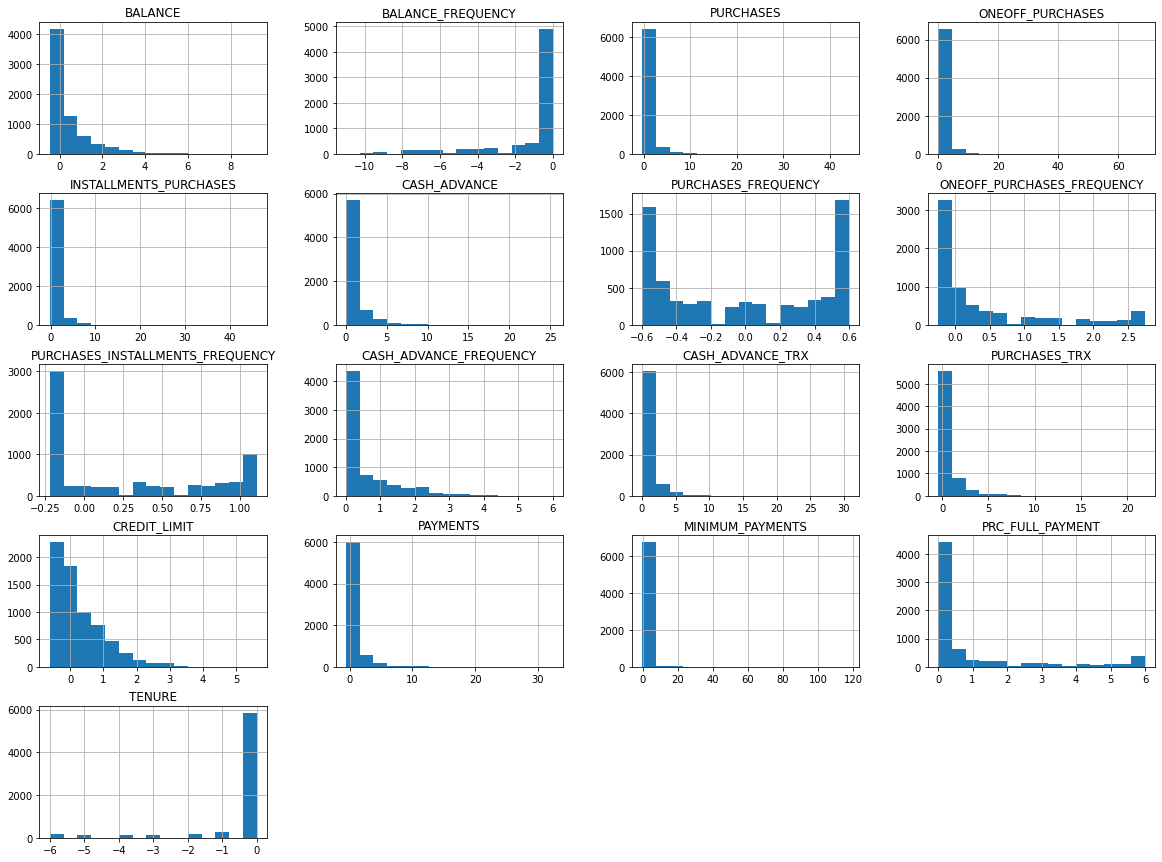

In [354]:
# Histogram 
CC_df_robust[columns].hist(bins=15, figsize=(20, 15), layout=(5, 4))

>>> #### 1.2.2.4. MinMaxScaler ->  standardization to [0, 1]-range

In [355]:
CC_df_minmax = CC_df.copy()
columns = CC_df_minmax.columns
features = CC_df_minmax[columns]
CC_df_minmax[columns] = MinMaxScaler().fit_transform(features.values)


In [356]:
CC_df_minmax.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,6908.0,0.084043,0.110171,0.0,0.007906,0.047771,0.111035,1.0
BALANCE_FREQUENCY,6908.0,0.894943,0.207767,0.0,0.909091,1.000000,1.000000,1.0
PURCHASES,6908.0,0.020900,0.044892,0.0,0.000766,0.007646,0.023293,1.0
ONEOFF_PURCHASES,6908.0,0.014822,0.042148,0.0,0.000000,0.001110,0.014475,1.0
INSTALLMENTS_PURCHASES,6908.0,0.018713,0.041057,0.0,0.000000,0.003984,0.021625,1.0
CASH_ADVANCE,6908.0,0.033956,0.069751,0.0,0.000000,0.000000,0.039464,1.0
PURCHASES_FREQUENCY,6908.0,0.492338,0.401506,0.0,0.083333,0.500000,0.916667,1.0
ONEOFF_PURCHASES_FREQUENCY,6908.0,0.204823,0.298796,0.0,0.000000,0.083333,0.333333,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,6908.0,0.365559,0.397625,0.0,0.000000,0.166667,0.750000,1.0
CASH_ADVANCE_FREQUENCY,6908.0,0.092189,0.134849,0.0,0.000000,0.000000,0.166667,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed09a77e50>,
      dtype=object)

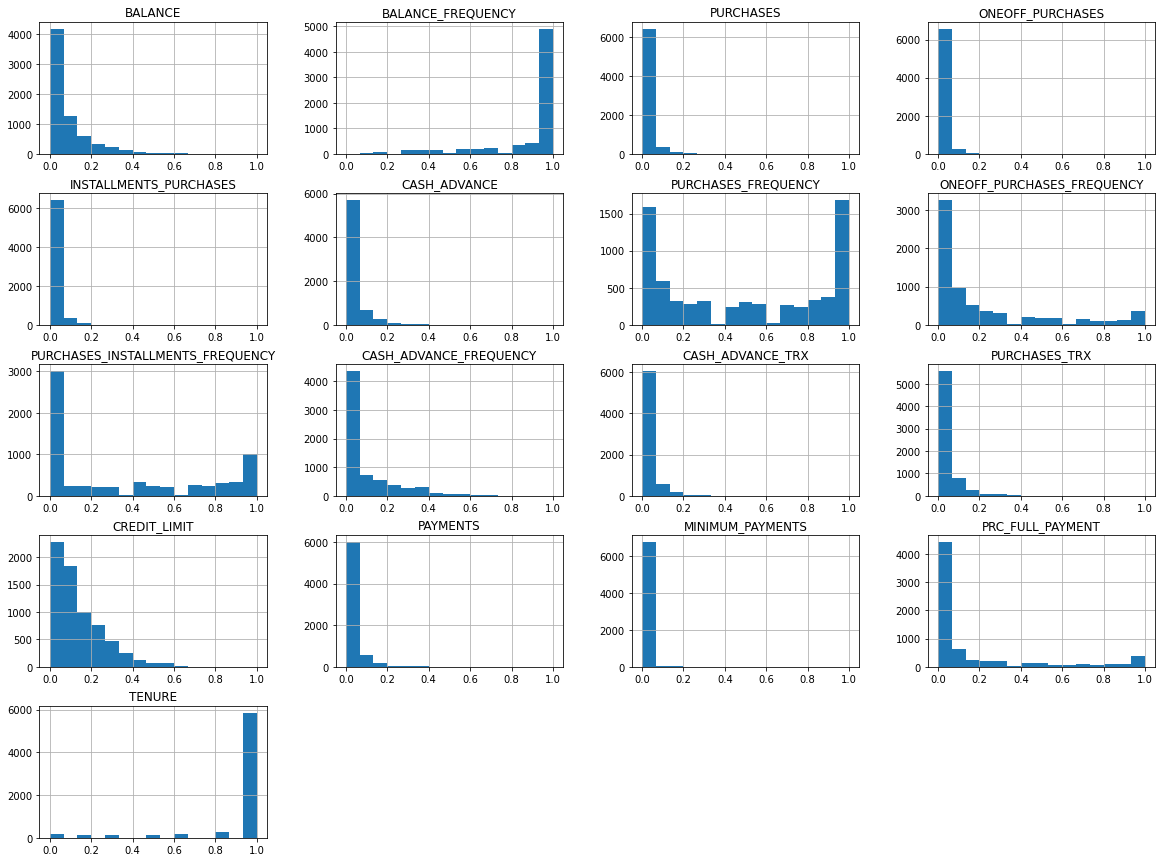

In [357]:
# Histogram 
CC_df_minmax[columns].hist(bins=15, figsize=(20, 15), layout=(5, 4))

# 3. Different Clustering Techniques

> ## 3.1. KMeans Clustering 

>> ### 3.1.1. Get Optimal number of clustering K

>>> #### 3.1.1.1. Using Silhoutte method to get optimumal



In [362]:
def K_sil_method(df):
  K = range(2,10)
  silhouette_avg = []
  opt_k = 0
  sil_k = {}
  for k in K:
    # initialise kmeans
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    cluster_labels=kmeanModel.labels_
    #print(cluster_labels)
    # silhouette score
    sil_score = silhouette_score(df, cluster_labels)
    silhouette_avg.append(sil_score)
    sil_k[k] = sil_score
  plt.plot(K, silhouette_avg, 'bx-')
  plt.xlabel('Values of K') 
  plt.ylabel('Silhouette score') 
  plt.title('Silhouette analysis For Optimal k')
  plt.show()
  for key, value in sil_k.items(): 
         if max(silhouette_avg) == value: 
             opt_k = key
        
  # choose the optimum K
  return opt_k


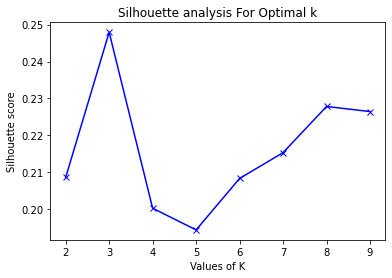

In [363]:
opt_k_sil = K_sil_method(CC_df_std)


In [364]:
print("The optimal K using silhoutte score: ", opt_k_sil)

The optimal K using silhoutte score:  3


>>> #### 3.1.1.2. Using Elbow method to get optimumal K



In [366]:
def elbow_method(df):
  distortions = []
  K = range(1,10)
  opt_k = 0
  for k in K:
      kmeanModel = KMeans(n_clusters=k)
      kmeanModel.fit(df)
      distortions.append((kmeanModel.inertia_)/k)
      cluster_labels = kmeanModel.labels_
  #print(len(distortions)-1)
  for i in range (1, len(distortions)-1):
   # print(i)
    if (distortions[i]-distortions[i+1])/(distortions[i-1]-distortions[i]) > 0.5:
      opt_k = i
   #   print(opt_k)
      break
  #print(distortions)
  plt.figure(figsize=(16,8))
  plt.plot(K, distortions, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Distortion')
  plt.title('The Elbow Method showing the optimal k')
  plt.show()
  return opt_k

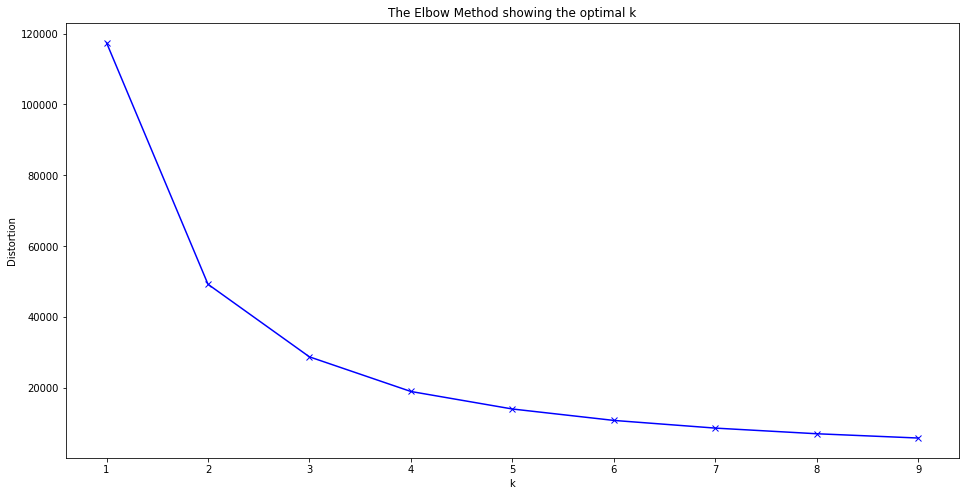

In [367]:
opt_k_elbow = elbow_method(CC_df_std)

In [368]:
print("The optimal K using elbow method: ", opt_k_elbow)

The optimal K using elbow method:  3


>> ### 3.1.2. Applying Kmean Clustering using optimal K



In [246]:
def Kmeans_plot (df, k):
  plt.rcParams['figure.figsize'] =(25,40)
  for num in range(0,17):
      ax = plt.subplot(5,4,num+1)
      col = df.columns[num]
      sns.stripplot(df['constant'],df[col], ax=ax, hue=df['label'])
      plt.xlabel('constant')

  plt.show()

In [247]:
CC_df_k = CC_df.copy()
kmeanModel = KMeans(n_clusters=opt_k_elbow)
kmeanModel.fit_predict(CC_df_std)
labels = kmeanModel.labels_
CC_df_k['clusters'] = labels

In [248]:
CC_df_k

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,1
8632,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8633,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8634,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [249]:
# CC_df_minmax_label = CC_df_minmax.copy()
# Kmeans_plot(CC_df_minmax_label, opt_k_sil)

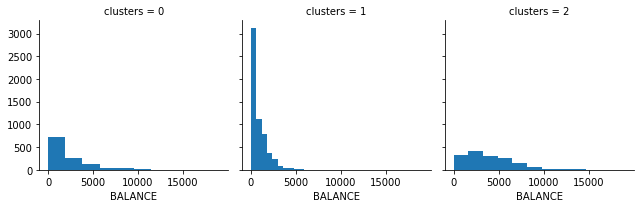

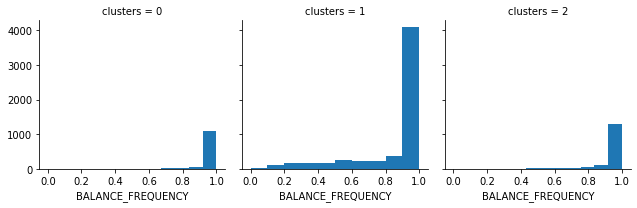

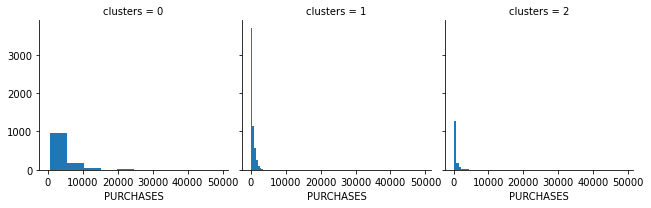

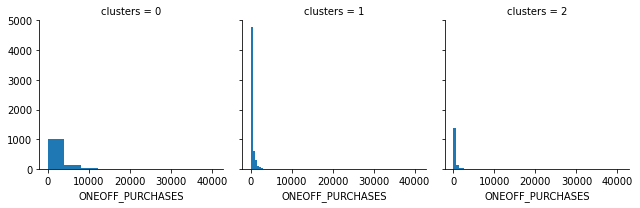

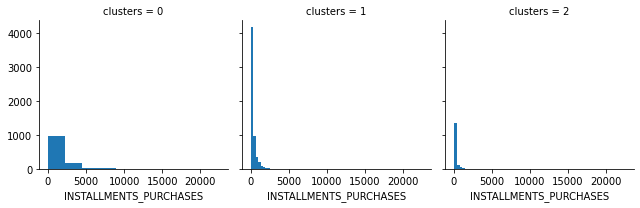

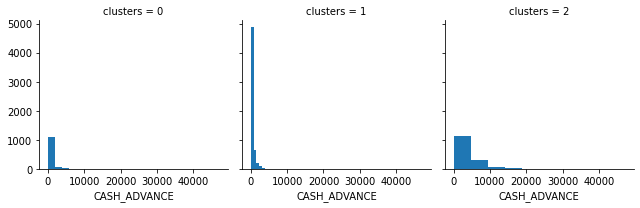

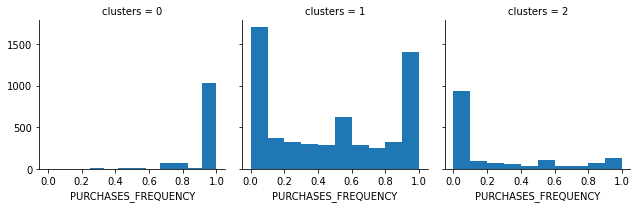

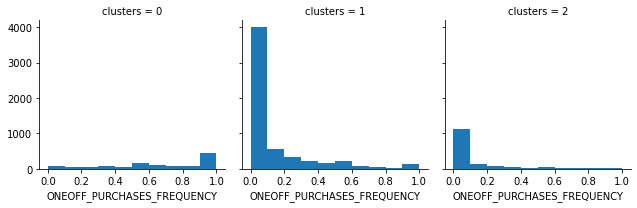

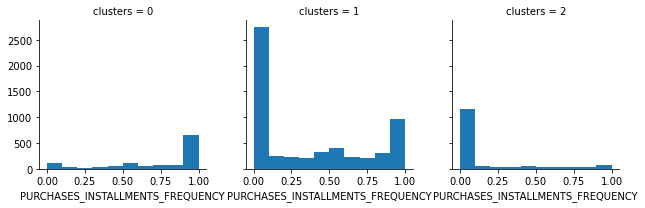

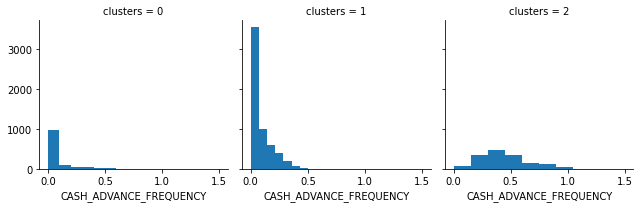

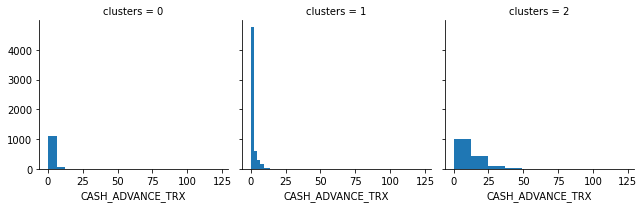

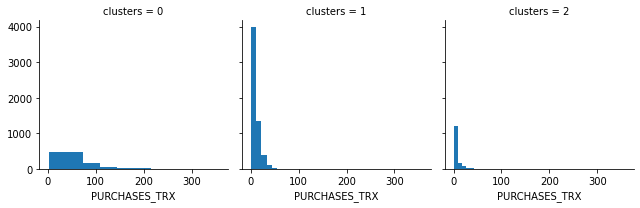

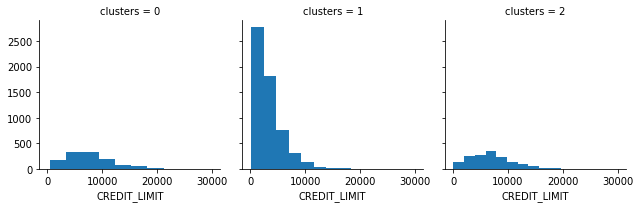

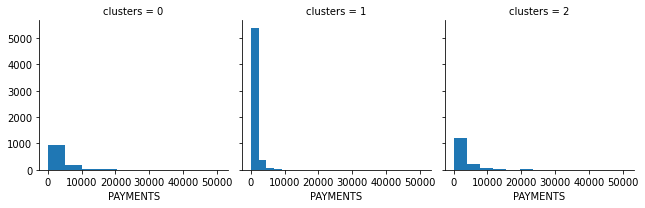

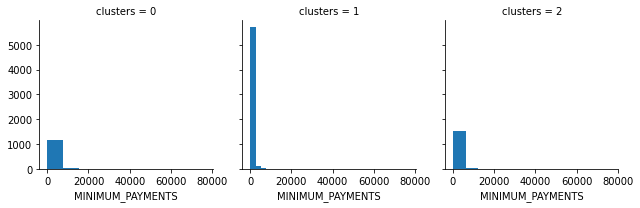

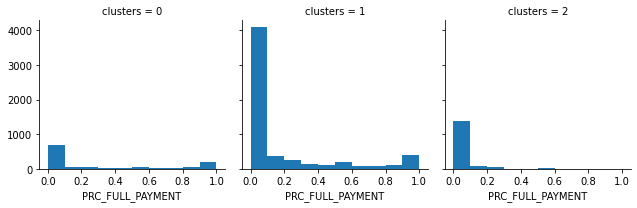

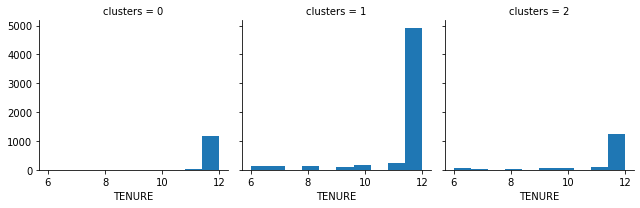

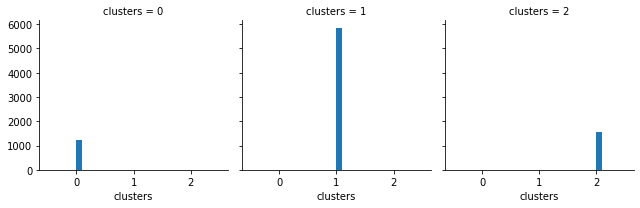

In [250]:
for c in CC_df_k:
    grid= sns.FacetGrid(CC_df_k, col='clusters')
    grid.map(plt.hist, c)

In [251]:
silhouette_score(CC_df_std, CC_df_k['clusters'], metric='euclidean')

0.24754638153191033

>> ### 3.1.3. KMeans Clustering using PCA

In [252]:
CC_df_std_nor = normalize(CC_df_std)
pca = PCA(n_components = 2).fit(CC_df_std_nor)
df_pca  = pca.fit_transform(CC_df_std_nor)

In [253]:
pca_df = pd.DataFrame(df_pca, columns = ["PCA1", "PCA2"])
pca_df


,PCA1,PCA2
0,-0.481788,-0.692991
1,-0.537375,0.527808
2,0.320760,0.265224
3,-0.562994,-0.503868
4,0.320512,-0.254468
...,...,...
8631,-0.214325,-0.267827
8632,0.320251,-0.195203
8633,0.183536,-0.245043
8634,-0.307306,-0.176105


In [254]:
pca_df.shape
#columns.shape

(8636, 2)

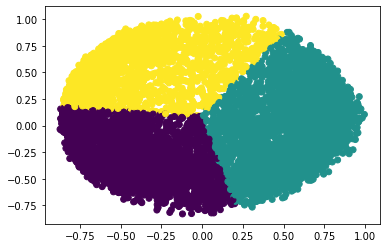

In [255]:
kmeanModel = KMeans(n_clusters=opt_k_elbow)
labels = kmeanModel.fit_predict(pca_df)
plt.scatter(pca_df['PCA1'], pca_df['PCA2'],
            c = labels) 
plt.show()

In [256]:
silhouette_score(pca_df, labels, metric='euclidean')

0.4547195643253931

>> ### 3.1.4. KMeans Clustering using KernelPCA

In [257]:
CC_df_std_nor = normalize(CC_df_std)
Kpca = KernelPCA(n_components = 2, kernel = 'rbf').fit(CC_df_std_nor)
df_Kpca  = Kpca.fit_transform(CC_df_std_nor)

In [258]:
Kpca_df = pd.DataFrame(df_Kpca, columns = ["PCA1", "PCA2"])
Kpca_df


,PCA1,PCA2
0,-0.158098,-0.226071
1,-0.172392,0.172719
2,0.104427,0.086621
3,-0.185598,-0.164991
4,0.105177,-0.082704
...,...,...
8631,-0.068386,-0.086018
8632,0.104202,-0.062359
8633,0.060031,-0.078151
8634,-0.098268,-0.055736


In [259]:
Kpca_df.shape
#columns.shape

(8636, 2)

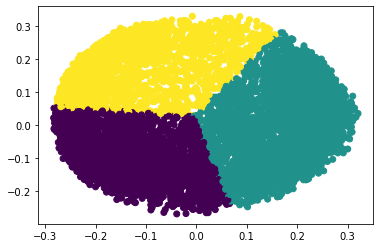

In [260]:
kmeanModel = KMeans(n_clusters=opt_k_elbow)
labels = kmeanModel.fit_predict(Kpca_df)
plt.scatter(Kpca_df['PCA1'], Kpca_df['PCA2'],
            c = labels) 
plt.show()

In [261]:
silhouette_score(Kpca_df, labels, metric='euclidean')

0.4550216765594345

>> ### 3.1.5. KMeans Clustering using TSNE

In [262]:
CC_df_std_nor = normalize(CC_df_std)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
df_tsne = tsne.fit_transform(CC_df_std_nor)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8636 samples in 0.000s...
[t-SNE] Computed neighbors for 8636 samples in 1.960s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8636
[t-SNE] Computed conditional probabilities for sample 2000 / 8636
[t-SNE] Computed conditional probabilities for sample 3000 / 8636
[t-SNE] Computed conditional probabilities for sample 4000 / 8636
[t-SNE] Computed conditional probabilities for sample 5000 / 8636
[t-SNE] Computed conditional probabilities for sample 6000 / 8636
[t-SNE] Computed conditional probabilities for sample 7000 / 8636
[t-SNE] Computed conditional probabilities for sample 8000 / 8636
[t-SNE] Computed conditional probabilities for sample 8636 / 8636
[t-SNE] Mean sigma: 0.161981
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.012314
[t-SNE] KL divergence after 300 iterations: 2.461266


In [263]:
tsne_df = pd.DataFrame(df_tsne, columns = ["TSNE1", "TSNE2"])
tsne_df


,TSNE1,TSNE2
0,3.089990,-7.509646
1,-6.175225,0.877236
2,-1.731684,4.255822
3,0.164092,-3.375106
4,2.793423,1.619134
...,...,...
8631,1.155401,-7.145128
8632,5.161213,-2.758548
8633,4.571025,-3.356423
8634,-0.206279,-7.457432


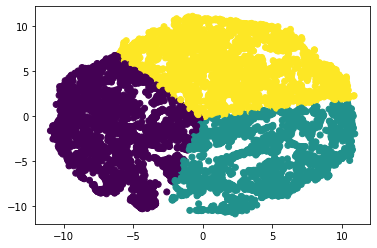

In [264]:
kmeansModel = KMeans(n_clusters=3)
labels = kmeansModel.fit_predict(tsne_df)
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'],
            c = labels) 
plt.show()

> ## 3.2. KMediods Clustering 

>> ### 3.2.1. Get Optimal number of clustering K

>>> #### 3.2.1.1. Using Silhoutte method to get optimal K



In [265]:
def K_sil_method(df):
  K = range(2,10)
  silhouette_avg = []
  opt_k = 0
  sil_k = {}
  for k in K:
    # initialise kmeans
    kmediodModel = KMedoids(n_clusters=k)
    kmediodModel.fit(df)
    cluster_labels=kmediodModel.labels_
    #print(cluster_labels)
    # silhouette score
    sil_score = silhouette_score(df, cluster_labels)
    silhouette_avg.append(sil_score)
    sil_k[k] = sil_score
  plt.plot(K, silhouette_avg, 'bx-')
  plt.xlabel('Values of K') 
  plt.ylabel('Silhouette score') 
  plt.title('Silhouette analysis For Optimal k')
  plt.show()
  for key, value in sil_k.items(): 
         if max(silhouette_avg) == value: 
             opt_k = key
        
  # choose the optimum K
  return opt_k


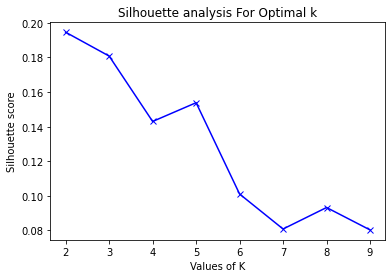

In [266]:
opt_k_sil = K_sil_method(CC_df_std)


In [267]:
print("The optimal K using silhoutte score: ", opt_k_sil)

The optimal K using silhoutte score:  2


In [268]:
def elbow_method(df):
  distortions = []
  K = range(1,10)
  opt_k = 0
  for k in K:
      kmediodModel = KMedoids(n_clusters=k)
      kmediodModel.fit(df)
      cluster_labels=kmediodModel.labels_      
      distortions.append((kmeanModel.inertia_)/k)
  #print(len(distortions)-1)
  for i in range (1, len(distortions)-1):
   # print(i)
    if (distortions[i]-distortions[i+1])/(distortions[i-1]-distortions[i]) > 0.5:
      opt_k = i
   #   print(opt_k)
      break
  #print(distortions)
  plt.figure(figsize=(16,8))
  plt.plot(K, distortions, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Distortion')
  plt.title('The Elbow Method showing the optimal k')
  plt.show()
  return opt_k

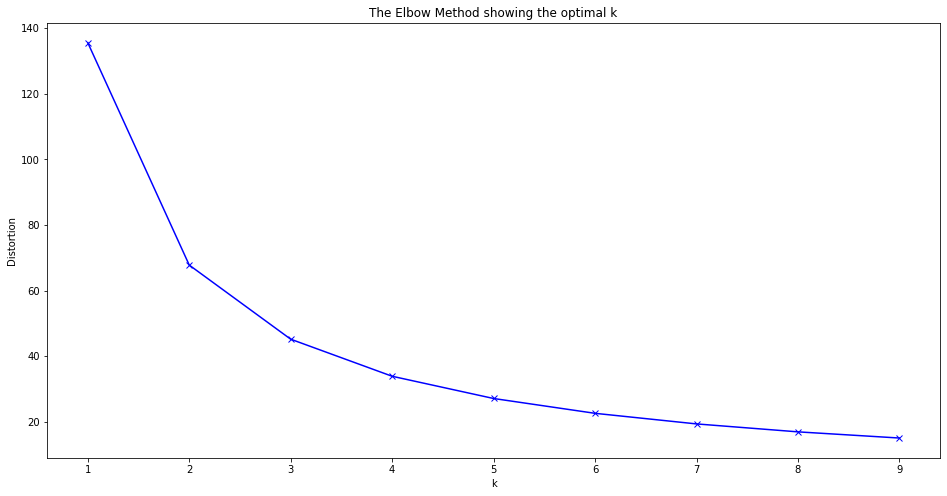

In [269]:
opt_k_elbow = elbow_method(CC_df_std)

In [270]:
print("The optimal K using elbow method: ", opt_k_elbow)

The optimal K using elbow method:  3


>> ### 3.2.2. Applying KMediods Clustering using optimal K

In [271]:
CC_df_k = CC_df.copy()
kmediodModel = KMedoids(n_clusters=opt_k_elbow)
kmediodModel.fit(CC_df_std)
cluster_labels=kmediodModel.labels_
labels = kmeanModel.labels_
CC_df_k['clusters'] = labels

In [272]:
CC_df_k

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,0
8632,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8633,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8634,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


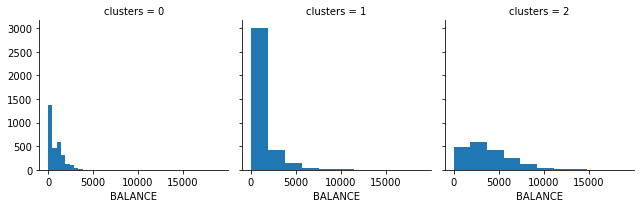

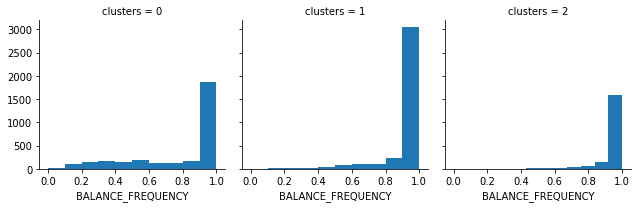

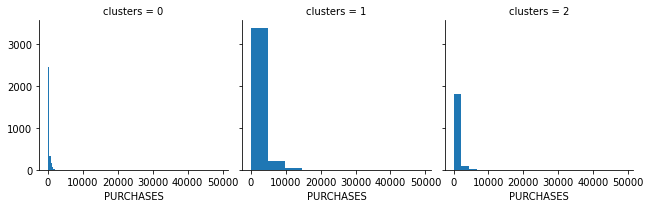

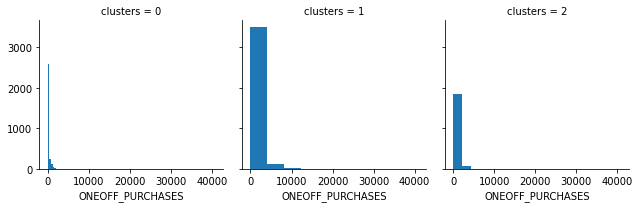

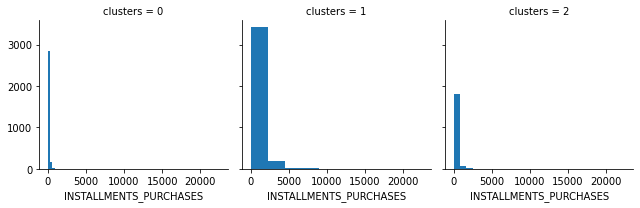

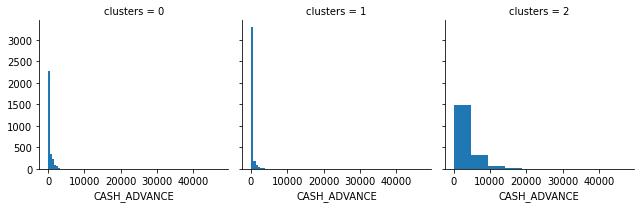

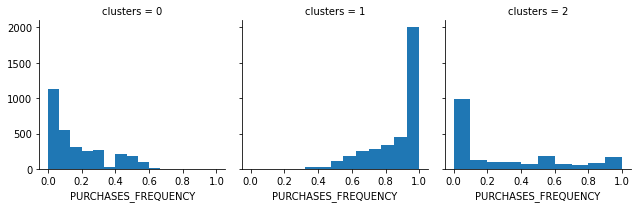

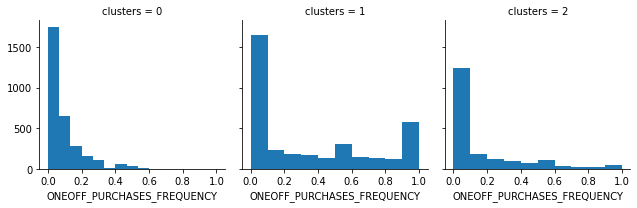

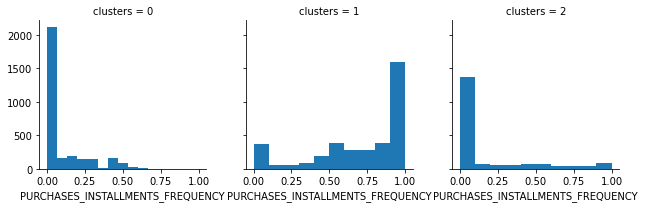

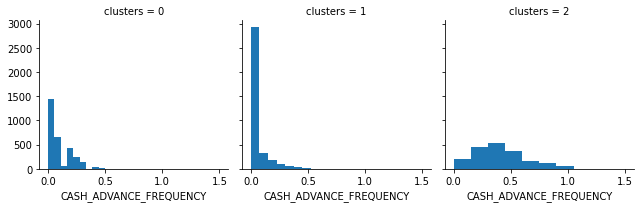

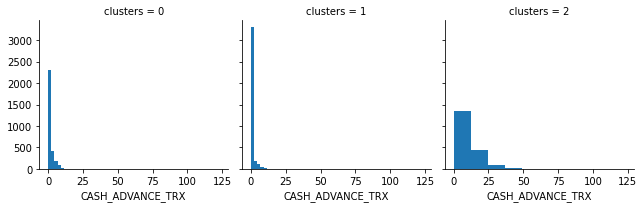

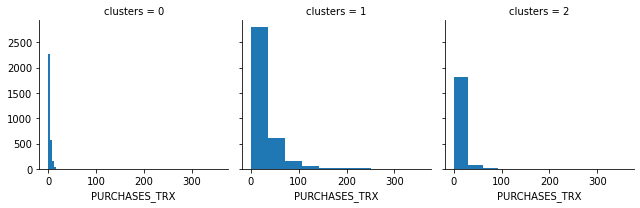

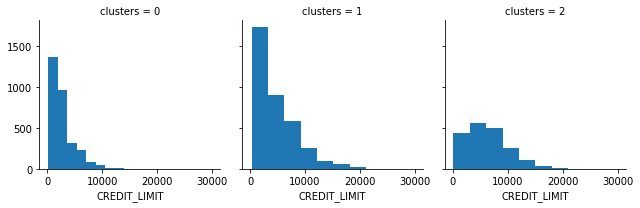

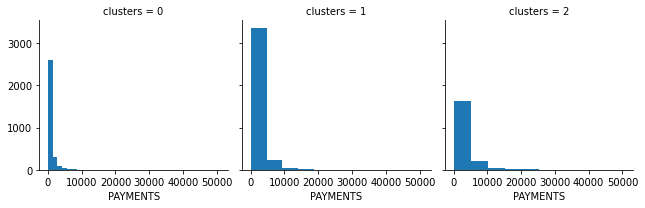

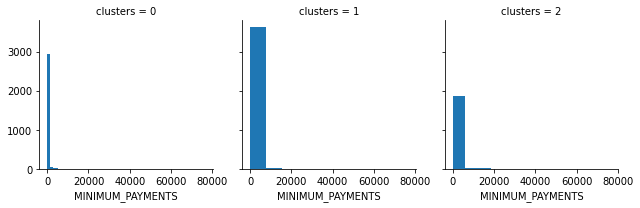

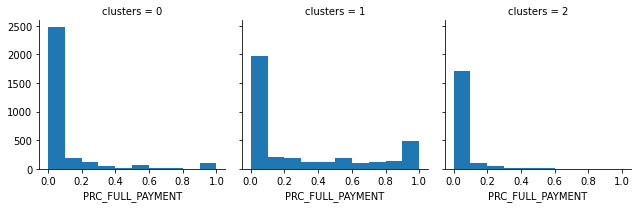

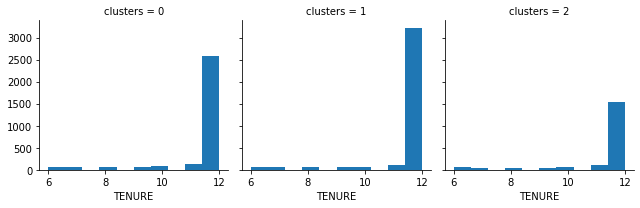

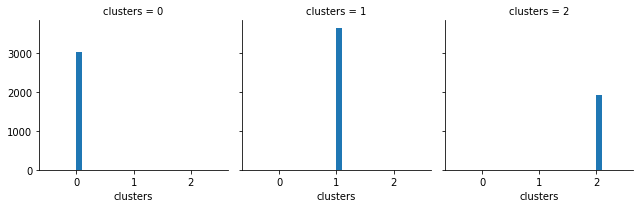

In [273]:
for c in CC_df_k:
    grid= sns.FacetGrid(CC_df_k, col='clusters')
    grid.map(plt.hist, c)

In [274]:
silhouette_score(CC_df_std, CC_df_k['clusters'], metric='euclidean')

0.15146192527871521

>> ### 3.2.3. KMediods Clustering using PCA

In [275]:
CC_df_std_nor = normalize(CC_df_std)
pca = PCA(n_components = 2).fit(CC_df_std_nor)
df_pca  = pca.fit_transform(CC_df_std_nor)

In [276]:
pca_df = pd.DataFrame(df_pca, columns = ["PCA1", "PCA2"])
pca_df


,PCA1,PCA2
0,-0.481788,-0.692991
1,-0.537375,0.527808
2,0.320760,0.265223
3,-0.562994,-0.503868
4,0.320512,-0.254471
...,...,...
8631,-0.214325,-0.267827
8632,0.320251,-0.195203
8633,0.183536,-0.245043
8634,-0.307306,-0.176105


In [277]:
pca_df.shape
#columns.shape

(8636, 2)

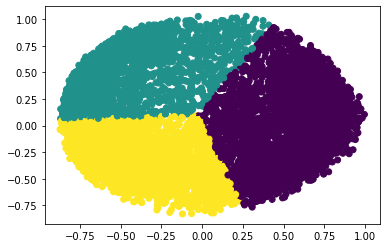

In [278]:
kmediodModel = KMedoids(n_clusters=opt_k_elbow)
labels = kmediodModel.fit_predict(pca_df)
plt.scatter(pca_df['PCA1'], pca_df['PCA2'],
            c = labels) 
plt.show()

In [279]:
silhouette_score(pca_df, labels, metric='euclidean')

0.4504935145152485

>> ### 3.2.4. KMediods Clustering using KernelPCA

In [280]:
CC_df_std_nor = normalize(CC_df_std)
Kpca = KernelPCA(n_components = 2, kernel = 'rbf').fit(CC_df_std_nor)
df_Kpca  = Kpca.fit_transform(CC_df_std_nor)

In [281]:
Kpca_df = pd.DataFrame(df_Kpca, columns = ["PCA1", "PCA2"])
Kpca_df


,PCA1,PCA2
0,-0.158098,-0.226071
1,-0.172392,0.172719
2,0.104427,0.086621
3,-0.185598,-0.164991
4,0.105177,-0.082704
...,...,...
8631,-0.068386,-0.086018
8632,0.104202,-0.062359
8633,0.060031,-0.078151
8634,-0.098268,-0.055736


In [282]:
Kpca_df.shape
#columns.shape

(8636, 2)

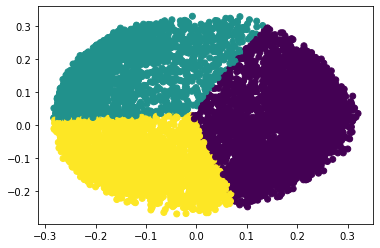

In [283]:
kmediodModel = KMedoids(n_clusters=opt_k_elbow)
labels = kmediodModel.fit_predict(Kpca_df)
plt.scatter(Kpca_df['PCA1'], Kpca_df['PCA2'],
            c = labels) 
plt.show()

In [284]:
silhouette_score(Kpca_df, labels, metric='euclidean')

0.451372957612939

>> ### 3.1.5. KMediods Clustering using TSNE

In [285]:
CC_df_std_nor = normalize(CC_df_std)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
df_tsne = tsne.fit_transform(CC_df_std_nor)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8636 samples in 0.000s...
[t-SNE] Computed neighbors for 8636 samples in 1.942s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8636
[t-SNE] Computed conditional probabilities for sample 2000 / 8636
[t-SNE] Computed conditional probabilities for sample 3000 / 8636
[t-SNE] Computed conditional probabilities for sample 4000 / 8636
[t-SNE] Computed conditional probabilities for sample 5000 / 8636
[t-SNE] Computed conditional probabilities for sample 6000 / 8636
[t-SNE] Computed conditional probabilities for sample 7000 / 8636
[t-SNE] Computed conditional probabilities for sample 8000 / 8636
[t-SNE] Computed conditional probabilities for sample 8636 / 8636
[t-SNE] Mean sigma: 0.161981
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.978790
[t-SNE] KL divergence after 300 iterations: 2.421181


In [286]:
tsne_df = pd.DataFrame(df_tsne, columns = ["TSNE1", "TSNE2"])
tsne_df


,TSNE1,TSNE2
0,2.470503,3.961300
1,-1.296013,4.869562
2,0.162464,-0.898593
3,-7.990682,-3.982497
4,-2.679890,-8.914809
...,...,...
8631,3.996859,9.180352
8632,8.300158,7.254403
8633,7.490649,7.627518
8634,2.345029,10.556466


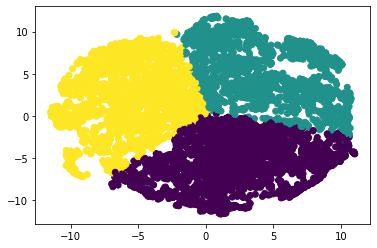

In [287]:
kMediodModel = KMedoids(n_clusters=3)
labels = kMediodModel.fit_predict(tsne_df)
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'],
            c = labels) 
plt.show()

In [ ]:
silhouette_score(tsne_df, labels, metric='euclidean')

> ## 3.3. Hierarchical methods

>> ### 3.3.1. Choosing metric and method using pdist

In [288]:
links = ['ward', 'complete', 'average', 'single', 'weighted', 'centroid', 'median']
metrics = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation',
        'cosine', 'dice', 'euclidean', 'hamming', 'jaccard',
        'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto',
        'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean']

In [289]:
columns = CC_df_std.columns
met_lin = {}
for metric in metrics:
  for link in links:
    if link == 'ward' and metric != 'euclidean':
            pass
    elif link == 'centroid' and metric != 'euclidean':
        pass
    elif link == 'median' and metric != 'euclidean':
        pass
    else:
      Z = shc.linkage(CC_df_std[columns], metric = metric, method = link)
      c, cop_dist = shc.cophenet(Z, distance.pdist(CC_df_std[columns]))
      if c > 0.8:
        key = metric + " + " + link
        met_lin [key] = c
        print("Metric: "+metric + " and Link: "+link+ " correlation score: "+str(c))


Metric: chebyshev and Link: complete correlation score: 0.8292055097753697
Metric: chebyshev and Link: average correlation score: 0.8704793472940504
Metric: chebyshev and Link: single correlation score: 0.8448357374035694
Metric: chebyshev and Link: weighted correlation score: 0.8052587349459928
Metric: cityblock and Link: average correlation score: 0.8305781964840179


/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:1699: RuntimeWarning: invalid value encountered in double_scalars
  c = numerator.sum() / np.sqrt((denomA.sum() * denomB.sum()))


Metric: euclidean and Link: complete correlation score: 0.8201186937921817
Metric: euclidean and Link: average correlation score: 0.8810566943599851
Metric: euclidean and Link: single correlation score: 0.8439715406337083
Metric: euclidean and Link: centroid correlation score: 0.8732883923310477
Metric: minkowski and Link: complete correlation score: 0.8201186937921817
Metric: minkowski and Link: average correlation score: 0.881056694359985
Metric: minkowski and Link: single correlation score: 0.8439715406337082
Metric: seuclidean and Link: complete correlation score: 0.820118693792184
Metric: seuclidean and Link: average correlation score: 0.881056694359987
Metric: seuclidean and Link: single correlation score: 0.8439715406337124
Metric: sqeuclidean and Link: average correlation score: 0.8037717787416976


In [290]:
max(met_lin.values())
met_lin.values()

dict_values([0.8292055097753697, 0.8704793472940504, 0.8448357374035694, 0.8052587349459928, 0.8305781964840179, 0.8201186937921817, 0.8810566943599851, 0.8439715406337083, 0.8732883923310477, 0.8201186937921817, 0.881056694359985, 0.8439715406337082, 0.820118693792184, 0.881056694359987, 0.8439715406337124, 0.8037717787416976])

In [291]:
for key, value in met_lin.items(): 
    if  value == max(met_lin.values()): 
        bestMethod=key
        break 
print("Best Method is:" + key + " with score: "+str(value))

Best Method is:seuclidean + average with score: 0.881056694359987


>> ### 3.3.2. Choosing optimal K

>>> #### 3.3.2.1. Choosing number of clusters using Dendrogram 

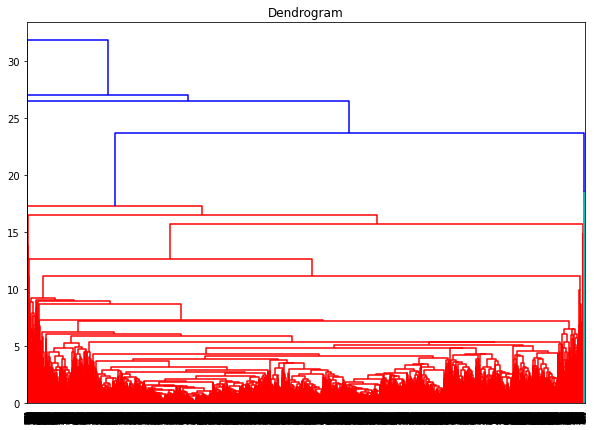

In [292]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(y=CC_df_std , method='average', metric='euclidean')) 

>>> #### 3.3.2.2. Choosing number of clusters using Silhoutte score

In [293]:
def K_sil_agg_method(df):
  K = range(2,10)
  silhouette_avg = []
  opt_k = 0
  sil_k = {}
  for k in K:
    # initialize agg clustering 
    AggClusterModel = AgglomerativeClustering(n_clusters=k)
    AggClusterModel.fit(df)
    cluster_labels=AggClusterModel.labels_
    #print(cluster_labels)
    # silhouette score
    sil_score = silhouette_score(df, cluster_labels)
    silhouette_avg.append(sil_score)
    if k != 2:
      sil_k[k] = sil_score
  plt.plot(K, silhouette_avg, 'bx-')
  plt.xlabel('Values of K') 
  plt.ylabel('Silhouette score') 
  plt.title('Silhouette analysis For Optimal k')
  plt.show()
  for key, value in sil_k.items(): 
   #print(key)
    if value == max(sil_k.values()): 
        opt_k = key
  #print(sil_k)
  # choose the optimum K
  return opt_k


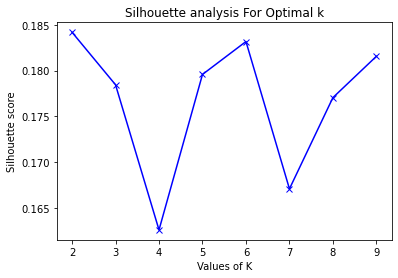

In [294]:
opt_agg_k = K_sil_agg_method(CC_df_std)

In [295]:
print("Optimal  number of clustering using sil score is: ", opt_agg_k)

Optimal  number of clustering using sil score is:  6


> ### 3.3.2. Applyin AggloAgglomerativeClustering with optimal K = 6, method = average and metric = eculidean 

In [296]:
CC_df_agg = CC_df.copy()
AggClusterModel = AgglomerativeClustering(n_clusters=opt_agg_k, affinity = 'euclidean', linkage = 'average')
AggClusterModel.fit(CC_df_std)
cluster_labels=AggClusterModel.labels_
CC_df_agg['clusters'] = cluster_labels

In [297]:
CC_df_agg

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,1
8632,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8633,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8634,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [298]:
silhouette_score(CC_df_std, CC_df_agg['clusters'], metric='euclidean')

0.7803420960043396

In [299]:
CC_df_agg = CC_df.copy()
AggClusterModel = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'average')
AggClusterModel.fit(CC_df_std)
cluster_labels=AggClusterModel.labels_
CC_df_agg['clusters'] = cluster_labels

In [300]:
CC_df_agg

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,1
8632,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8633,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8634,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [301]:
silhouette_score(CC_df_std, CC_df_agg['clusters'], metric='euclidean')

0.7803420960043396

In [302]:
CC_df_agg = CC_df.copy()
AggClusterModel = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')
AggClusterModel.fit(CC_df_std)
cluster_labels=AggClusterModel.labels_
CC_df_agg['clusters'] = cluster_labels

In [303]:
CC_df_agg

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,0
8632,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8633,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8634,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [304]:
silhouette_score(CC_df_std, CC_df_agg['clusters'], metric='euclidean')

0.8047854548225128

> ## 3.4. DBSCAN

>> ### 3.4.1. Choosing eps range using Nearest Neighbour

In [305]:
def NN_eps (df):
  NN_model = NearestNeighbors(n_neighbors=2).fit(df)
  distances, indices = NN_model.kneighbors(df)
  distances = np.sort(distances, axis=0)
  distances = distances[:,1]
  plt.figure(figsize=(20,10))
  plt.plot(distances)
  plt.title('K-distance Graph',fontsize=20)
  plt.xlabel('Data Points sorted by distance',fontsize=14)
  plt.ylabel('Epsilon',fontsize=14)
  plt.show()


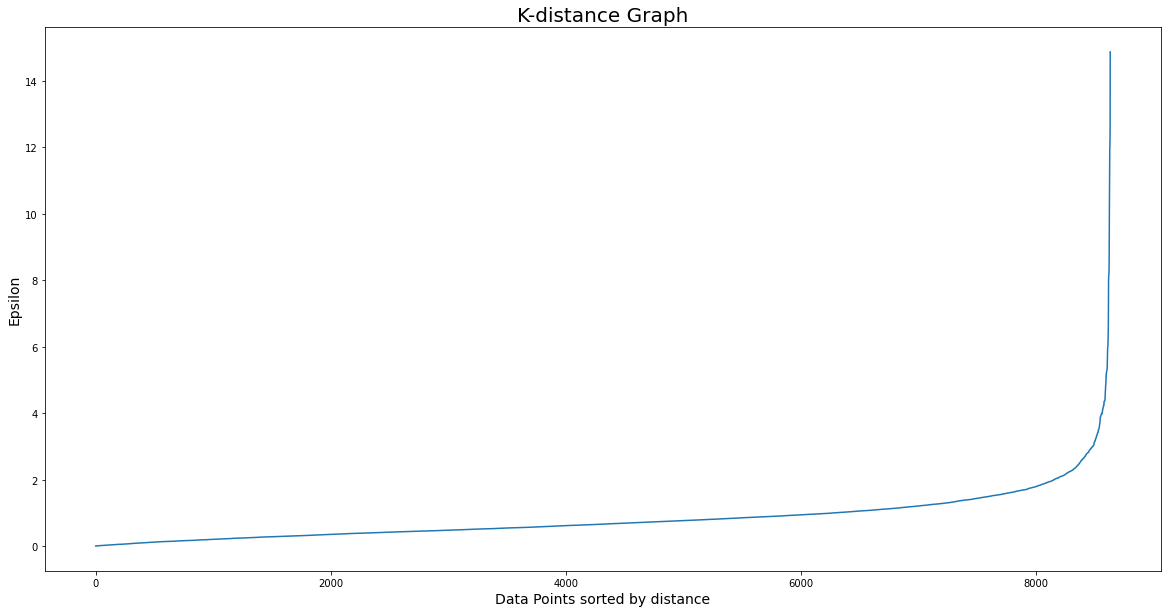

In [306]:
NN_eps(CC_df_std)

from the graph we can conculde that most of points (almost 8000) is under eps distance of 2

In [307]:
eps_range = np.arange(0.1, 2, 0.2)


>> ### 3.4.2. Choosing eps and minPoints

In [308]:
def eps_minPoint(df, eps_range):
  silhouette_avg = []
  sil_eps_p = {}
  for eps in eps_range:
    for minPoints in range (3, 10): # minPoint at least  = 3
      dbscan_model = DBSCAN(eps = eps, min_samples = minPoints).fit(df)
      cluster_labels=dbscan_model.labels_
      sil_score = silhouette_score(df, cluster_labels)
      silhouette_avg.append(sil_score)
      key = str(eps) +" and "+ str(minPoints)
      sil_eps_p[key] = sil_score
      print("Eps: "+str(eps)+", minPoints: "+str(minPoints) + ", Score: " +str(sil_score)+ ", number of clusters: ", str(len(set(dbscan_model.labels_))))
  for key, value in sil_eps_p.items(): 
    if value == max(silhouette_avg): 
        print ("Optimum eps and minPoints: ", key)

In [309]:
eps_minPoint(CC_df_std, eps_range)

Eps: 0.1, minPoints: 3, Score: -0.4689633985711107, number of clusters:  42
Eps: 0.1, minPoints: 4, Score: -0.4195692899675594, number of clusters:  23
Eps: 0.1, minPoints: 5, Score: -0.3737304348974619, number of clusters:  12
Eps: 0.1, minPoints: 6, Score: -0.2750774407861322, number of clusters:  6
Eps: 0.1, minPoints: 7, Score: -0.25366918294691654, number of clusters:  4
Eps: 0.1, minPoints: 8, Score: -0.25090328181425725, number of clusters:  3
Eps: 0.1, minPoints: 9, Score: -0.25124562443919085, number of clusters:  3
Eps: 0.30000000000000004, minPoints: 3, Score: -0.47800400639962526, number of clusters:  111
Eps: 0.30000000000000004, minPoints: 4, Score: -0.42545050596702805, number of clusters:  50
Eps: 0.30000000000000004, minPoints: 5, Score: -0.4187151511195021, number of clusters:  39
Eps: 0.30000000000000004, minPoints: 6, Score: -0.4257845119771976, number of clusters:  32
Eps: 0.30000000000000004, minPoints: 7, Score: -0.412799048354344, number of clusters:  22
Eps: 0.

>> ### 3.4.3. Applying DBSCAN

In [310]:
CC_df_dbscan = CC_df.copy()
eps = 1.9
minPoints = 5
dbscan_model = DBSCAN(eps = eps, min_samples = minPoints).fit(CC_df_std)
DBSCAN_labels=dbscan_model.labels_
CC_df_dbscan['clusters'] = DBSCAN_labels

In [311]:
silhouette_score(CC_df_std, DBSCAN_labels)


0.4587942262610554

# 4. Anomaly Detection 


> ## 4.1. Using DBSCAN

In [312]:
anomaly_df = CC_df[DBSCAN_labels==-1]


In [313]:
anomaly_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.00,12
20,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.00,12
22,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.00,12
29,12136.219960,1.000000,3038.01,1013.20,2024.81,3183.583301,1.000000,0.166667,1.000000,0.500000,10,64,13000.0,4230.323491,3292.015030,0.00,12
33,3517.101616,0.727273,547.28,0.00,547.28,0.000000,1.000000,0.000000,1.000000,0.000000,0,14,11000.0,8735.607835,17862.558310,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8554,1382.936306,0.875000,336.00,0.00,336.00,4158.990631,0.875000,0.000000,0.750000,0.125000,5,7,4000.0,754.256439,681.059427,0.60,8
8588,328.686581,1.000000,2806.78,2588.53,218.25,0.000000,0.857143,0.714286,0.285714,0.000000,0,26,1200.0,1796.886852,93.017466,0.25,7
8605,181.891981,0.500000,0.00,0.00,0.00,1865.191764,0.000000,0.000000,0.000000,0.500000,10,0,2000.0,4565.356495,88.057892,1.00,6
8613,486.661842,0.833333,1898.88,939.09,959.79,0.000000,0.833333,0.666667,0.666667,0.000000,0,24,1200.0,669.039640,336.880119,0.50,6


> ## 4.2. Using EM

In [314]:
GmmModel = GaussianMixture(n_components = 2, covariance_type = 'spherical', max_iter = 300, verbose = 1, tol = 0.00001)
GmmModel.fit(CC_df_std)

Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged: True


GaussianMixture(covariance_type='spherical', max_iter=300, n_components=2,
                tol=1e-05, verbose=1)

In [315]:
CC_df_Gmm = CC_df.copy()
Gmmlabels = GmmModel.predict(CC_df_std)
Gmmscore = GmmModel.score_samples(CC_df_std)
CC_df_Gmm['labels'] = Gmmlabels
#CC_df_Gmm['scores'] = Gmmscore
CC_df_Gmm

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,labels
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,0
8632,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8633,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8634,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [316]:
Gmmscore.shape

(8636,)

In [317]:
thresh = np.quantile(Gmmscore, 0.03)
print(thresh) 

-35.426247704394115


In [318]:
outlier_df = CC_df_Gmm[Gmmscore<thresh]
outlier_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,labels
33,3517.101616,0.727273,547.28,0.00,547.28,0.000000,1.000000,0.000000,1.000000,0.000000,0,14,11000.0,8735.607835,17862.558310,0.000000,12,0
47,4931.331857,1.000000,901.42,646.07,255.35,8530.648614,0.625000,0.375000,0.250000,0.875000,37,9,12000.0,8113.297346,1012.415961,0.000000,8,0
64,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.485760,0.666667,0.500000,0.583333,0.833333,27,33,7000.0,28232.694460,1107.030803,0.454545,12,0
110,14224.115410,1.000000,0.00,0.00,0.00,4614.427403,0.000000,0.000000,0.000000,0.333333,9,0,19000.0,3066.614272,3406.258999,0.000000,12,0
111,2392.917738,1.000000,12462.44,12462.44,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,217,2800.0,11628.715570,2000.990921,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7963,2144.040539,1.000000,0.00,0.00,0.00,14127.466640,0.000000,0.000000,0.000000,0.416667,23,0,3500.0,12571.814660,525.168936,0.300000,12,0
8039,2648.244646,1.000000,0.00,0.00,0.00,10458.978150,0.000000,0.000000,0.000000,1.000000,123,0,4000.0,9818.531412,665.888853,0.000000,12,0
8141,3911.628474,0.875000,0.00,0.00,0.00,11951.903320,0.000000,0.000000,0.000000,0.500000,40,0,7000.0,7918.877416,905.569605,0.166667,8,0
8250,3326.323283,1.000000,8209.77,2218.28,5991.49,0.000000,1.000000,0.416667,1.000000,0.000000,0,130,10000.0,1942.074765,702.905059,0.083333,12,0


> ## 4.3. Using IsolatedForest

In [319]:
IsoForModel = IsolationForest(n_estimators = 100, max_samples = 'auto', contamination = 0.1, max_features = 1)
IsoForModel.fit(CC_df_std)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.1, max_features=1)

In [320]:
IsoAnomlabels = IsoForModel.predict(CC_df_std)

In [321]:
anomaly_df = CC_df[IsoAnomlabels==-1]
anomaly_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.00,12
20,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.00,12
22,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.00,12
29,12136.219960,1.000000,3038.01,1013.20,2024.81,3183.583301,1.000000,0.166667,1.000000,0.500000,10,64,13000.0,4230.323491,3292.015030,0.00,12
33,3517.101616,0.727273,547.28,0.00,547.28,0.000000,1.000000,0.000000,1.000000,0.000000,0,14,11000.0,8735.607835,17862.558310,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8603,376.547421,0.857143,520.00,280.00,240.00,1178.402416,0.857143,0.142857,0.714286,0.714286,9,7,1000.0,929.415656,103.927887,0.20,7
8605,181.891981,0.500000,0.00,0.00,0.00,1865.191764,0.000000,0.000000,0.000000,0.500000,10,0,2000.0,4565.356495,88.057892,1.00,6
8609,11.294184,0.666667,155.00,0.00,155.00,0.000000,0.666667,0.000000,0.500000,0.000000,0,4,1000.0,149.588599,43.341698,0.50,6
8629,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.00,6


# Final Model


using AgglomerativeClustering sith heighest silhoutte score and clusters = 6

In [372]:
cc_df_test_std = cc_df_test.copy()
columns = cc_df_test_std.columns
features = cc_df_test_std[columns]
cc_df_test_std[columns] = StandardScaler().fit_transform(features.values)

In [373]:
cc_df_test_label = cc_df_test.copy()
AggClusterModel = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'average')
labels = AggClusterModel.fit_predict(cc_df_test_std)
cc_df_test_label ['cluster'] = labels


In [374]:
cc_df_test_label

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2263,19.112841,1.000000,504.20,0.00,504.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,20,1000.0,476.370018,130.862225,0.727273,12,1
6255,834.825957,1.000000,0.00,0.00,0.00,1195.000251,0.000000,0.000000,0.000000,0.250000,6,0,1200.0,1392.439311,221.752549,0.100000,12,1
7316,29.466141,0.545455,149.00,149.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1000.0,350.176472,215.215582,0.000000,12,1
2045,226.030380,1.000000,435.08,435.08,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,15,7500.0,3796.014359,180.308803,0.200000,12,1
5253,38.160715,0.545455,340.00,0.00,340.00,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,5000.0,888.221177,146.348596,1.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,1350.286625,1.000000,642.33,642.33,0.00,0.000000,0.500000,0.500000,0.000000,0.000000,0,12,9000.0,323.683167,344.973051,0.000000,12,1
6500,82.902896,0.727273,430.43,0.00,430.43,0.000000,0.500000,0.000000,0.416667,0.000000,0,10,2500.0,315.075002,87.824996,0.083333,12,1
7873,226.306461,0.363636,0.00,0.00,0.00,788.235661,0.000000,0.000000,0.000000,0.166667,3,0,1200.0,184.701045,217.492643,0.000000,12,1
6652,9.153671,0.272727,126.60,0.00,126.60,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,2900.0,134.386353,46.037748,0.000000,12,1


#### Detecting if there are any anomalies

In [380]:
IsoForModel = IsolationForest(n_estimators = 100, max_samples = 'auto', contamination = 0.1, max_features = 1)
IsoForModel.fit(cc_df_test_std)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.1, max_features=1)

In [381]:
IsoAnomlabels = IsoForModel.predict(cc_df_test_std)

In [383]:
anomaly_df = cc_df_test[IsoAnomlabels==-1]
anomaly_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2517,6810.401782,1.000000,635.76,164.32,471.44,3863.405310,0.916667,0.083333,0.916667,0.250000,13,17,10000.0,3161.148768,3781.907645,0.000000,12
1458,3608.548972,0.900000,1664.02,1620.60,43.42,3899.963528,0.500000,0.500000,0.100000,0.300000,5,15,5000.0,1043.772722,1488.313908,0.000000,10
1063,4550.717687,1.000000,2094.99,1357.00,737.99,2392.186586,1.000000,0.500000,1.000000,0.166667,2,23,7600.0,3172.264416,1091.281356,0.000000,12
7998,1410.909779,1.000000,698.88,0.00,698.88,948.848018,1.000000,0.000000,1.000000,0.166667,8,12,1200.0,79.578186,11795.280960,0.083333,12
5440,8894.553534,1.000000,476.84,476.84,0.00,6098.490836,0.166667,0.166667,0.000000,0.583333,16,3,12000.0,2163.376448,2871.461432,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4058,889.090252,1.000000,9751.90,5896.76,3855.14,0.000000,1.000000,1.000000,0.916667,0.000000,0,115,4500.0,8418.403666,206.690230,0.666667,12
4363,7558.010921,1.000000,365.26,188.56,176.70,4738.307540,0.500000,0.083333,0.416667,0.666667,25,9,8000.0,3311.192387,4903.859993,0.000000,12
3909,293.614532,0.857143,839.61,839.61,0.00,2018.794348,0.714286,0.714286,0.000000,0.857143,12,11,3000.0,2585.110269,102.177146,0.500000,7
3732,5000.825577,1.000000,3310.39,3072.89,237.50,2019.865472,0.750000,0.666667,0.333333,0.083333,1,28,7500.0,2633.433636,2412.441231,0.000000,12


#### Graph of 6 segments using PCA

In [375]:
CC_df_std_nor = normalize(cc_df_test_std)
Kpca = KernelPCA(n_components = 2, kernel = 'rbf').fit(CC_df_std_nor)
df_Kpca  = Kpca.fit_transform(CC_df_std_nor)

In [376]:
Kpca_df = pd.DataFrame(df_Kpca, columns = ["PCA1", "PCA2"])
Kpca_df


,PCA1,PCA2
0,0.203738,-0.140351
1,-0.261360,-0.028172
2,-0.153387,-0.188982
3,0.113717,0.052342
4,0.058932,-0.140944
...,...,...
1723,-0.009792,0.035608
1724,-0.008211,-0.264078
1725,-0.172870,-0.122585
1726,-0.021398,-0.175693


In [377]:
Kpca_df.shape
#columns.shape

(1728, 2)

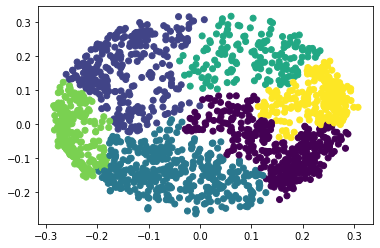

In [379]:
labels = AggClusterModel.fit_predict(Kpca_df)
plt.scatter(Kpca_df['PCA1'], Kpca_df['PCA2'],
            c = labels) 
plt.show()

>### There are 6 Segements 

>> #### Seg 1

-  Increased balances.
- Average purchases, mainly one-off.
- Low cash advance usage.
- Increased balances compared to their purchases suggest that they tend to carry past balances; this conclusion is also indicated by increased usage of  their limit (balance to credit limit ratio).
- They seem to pay a small amount of their due balance every month, as indicated by the low payments to statement balance ratio. Their ‘‘revolver’’ behavior is also suggested by the fact that they have the lowest percentage of months with full payment of their due balance.

>> #### Seg 2

- Highest cash advance usage in terms of frequency and amount of cash withdrawals.
- Few purchases.
- 85% of their total card spending is attributed to cash advances.
- Highest monthly balance amounts.
- They also present high limit usage.
- they tend to carry past balances and pay only a part of their monthly  balances as indicated by the low frequency of full payments and the similarly low ratio of payments to balance.

>> #### Seg 3


- Highest purchases, in terms of frequency and volume.
- One-off as well as installment purchases.
- Moderate balances and limit usage.
- Their spending is almost exclusively purchases since their cash advance usage is low. 
- Their high payments to balance ratio and frequency of full payments suggest a transactor behavior.

>> #### Seg 4

- Relatively low purchases.
- Their spending is almost exclusively on installments.
- Moderate balances.

>> #### Seg 5

- Lowest purchases and cash advance usage.
- Lowest ratio of balance to credit limit.
- Insignificant (remnant?) balances.

>> #### Seg6

- Increased purchases, including almost exclusively one-off purchases.
- High-value but infrequent purchase transactions: their purchase frequency is
relatively low; however, they have the largest average amount per purchase transaction.
- Moderate balances and credit limit usage.
- They present a transactor behavior.



------



# Scenario 2

# 2. Data Preparation for Model

> ## 2.1. Adding new Column related to Scenario

In [385]:
Amount_owned_col = 0.3 * (CC_data ['BALANCE'] / CC_data['CREDIT_LIMIT'])
Payment_history_col = 0.35 * (CC_data ['PRC_FULL_PAYMENT'])

In [389]:
CC_loan_df = pd.DataFrame (Amount_owned_col, columns = ['AMOUNT_OWN'])
CC_loan_df['PAYMENT_HISTORY'] = Payment_history_col
CC_loan_df

,AMOUNT_OWN,PAYMENT_HISTORY
0,0.012270,0.000000
1,0.137249,0.077778
2,0.099806,0.000000
3,0.204429,0.000000
4,0.301638,0.000000
...,...,...
8631,0.003523,0.000000
8632,0.008548,0.175000
8633,0.007020,0.087500
8634,0.008075,0.087500


> ## 2.1. Data Splitting

In [390]:
CC_df, cc_df_test = train_test_split(CC_loan_df, test_size=0.2, random_state=1)


> ## 2.2.  Scaling and Transform

>>>### 2.2.1. LogTransform 

In [391]:
CC_df_log = CC_df.copy()
columns = CC_df_log.columns
for col in columns:
  CC_df_log [col] = np.log(CC_df_log[col]+1)

In [392]:
CC_df_log.describe().T

,count,mean,std,min,25%,50%,75%,max
AMOUNT_OWN,6908.0,0.107750,0.095199,0.0,0.014194,0.090917,0.196387,1.753189
PAYMENT_HISTORY,6908.0,0.050398,0.090502,0.0,0.000000,0.000000,0.056695,0.300105


>>> #### 1.2.2.2. StandardScaler -> scaling to unit variance   





In [393]:
CC_df_std = CC_df.copy()
columns = CC_df_std.columns
features = CC_df_std[columns]
CC_df_std[columns] = StandardScaler().fit_transform(features.values)


In [394]:
CC_df_std.describe().T

,count,mean,std,min,25%,50%,75%,max
AMOUNT_OWN,6908.0,8.434352e-17,1.000072,-0.994128,-0.874775,-0.199468,0.817617,38.856193
PAYMENT_HISTORY,6908.0,1.594298e-17,1.000072,-0.542843,-0.542843,-0.542843,0.020175,2.835255


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed018d9510>,
      dtype=object)

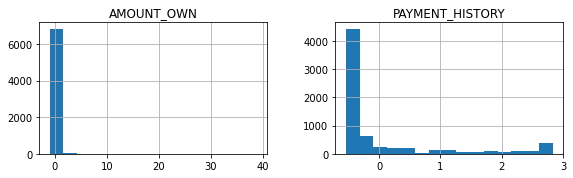

In [395]:
# Histogram 
CC_df_std[columns].hist(bins=15, figsize=(20, 15), layout=(5, 4))

>>> #### 1.2.2.3. RobustScaler -> standardization to a unit value of a robust variance estimator 

In [396]:
CC_df_robust = CC_df.copy()
columns = CC_df_robust.columns
features = CC_df_robust[columns]
CC_df_robust[columns] = RobustScaler().fit_transform(features.values)


In [397]:
CC_df_robust.describe().T

,count,mean,std,min,25%,50%,75%,max
AMOUNT_OWN,6908.0,0.117862,0.590922,-0.469548,-0.399025,0.0,0.600975,23.077198
PAYMENT_HISTORY,6908.0,0.964167,1.776273,0.000000,0.000000,0.0,1.000000,5.999988


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed09a783d0>,
      dtype=object)

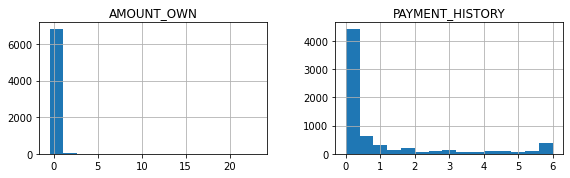

In [398]:
# Histogram 
CC_df_robust[columns].hist(bins=15, figsize=(20, 15), layout=(5, 4))

>>> #### 1.2.2.4. MinMaxScaler ->  standardization to [0, 1]-range

In [399]:
CC_df_minmax = CC_df.copy()
columns = CC_df_minmax.columns
features = CC_df_minmax[columns]
CC_df_minmax[columns] = MinMaxScaler().fit_transform(features.values)


In [400]:
CC_df_minmax.describe().T

,count,mean,std,min,25%,50%,75%,max
AMOUNT_OWN,6908.0,0.024947,0.025096,0.0,0.002995,0.019941,0.045464,1.0
PAYMENT_HISTORY,6908.0,0.160695,0.296046,0.0,0.000000,0.000000,0.166667,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed06dd9390>,
      dtype=object)

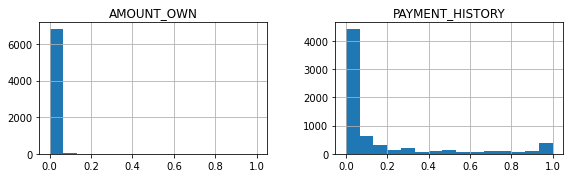

In [401]:
# Histogram 
CC_df_minmax[columns].hist(bins=15, figsize=(20, 15), layout=(5, 4))

# 3. Different Clustering Techniques

> ## 3.1. KMeans Clustering 

>> ### 3.1.1. Get Optimal number of clustering K

>>> #### 3.1.1.1. Using Silhoutte method to get optimumal



In [402]:
def K_sil_method(df):
  K = range(2,10)
  silhouette_avg = []
  opt_k = 0
  sil_k = {}
  for k in K:
    # initialise kmeans
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    cluster_labels=kmeanModel.labels_
    #print(cluster_labels)
    # silhouette score
    sil_score = silhouette_score(df, cluster_labels)
    silhouette_avg.append(sil_score)
    sil_k[k] = sil_score
  plt.plot(K, silhouette_avg, 'bx-')
  plt.xlabel('Values of K') 
  plt.ylabel('Silhouette score') 
  plt.title('Silhouette analysis For Optimal k')
  plt.show()
  for key, value in sil_k.items(): 
         if max(silhouette_avg) == value: 
             opt_k = key
        
  # choose the optimum K
  return opt_k


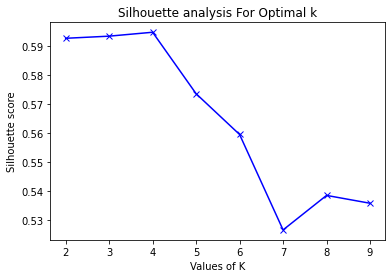

In [403]:
opt_k_sil = K_sil_method(CC_df_std)


In [404]:
print("The optimal K using silhoutte score: ", opt_k_sil)

The optimal K using silhoutte score:  4


>>> #### 3.1.1.2. Using Elbow method to get optimumal K



In [405]:
def elbow_method(df):
  distortions = []
  K = range(1,10)
  opt_k = 0
  for k in K:
      kmeanModel = KMeans(n_clusters=k)
      kmeanModel.fit(df)
      distortions.append((kmeanModel.inertia_)/k)
      cluster_labels = kmeanModel.labels_
  #print(len(distortions)-1)
  for i in range (1, len(distortions)-1):
   # print(i)
    if (distortions[i]-distortions[i+1])/(distortions[i-1]-distortions[i]) > 0.5:
      opt_k = i
   #   print(opt_k)
      break
  #print(distortions)
  plt.figure(figsize=(16,8))
  plt.plot(K, distortions, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Distortion')
  plt.title('The Elbow Method showing the optimal k')
  plt.show()
  return opt_k

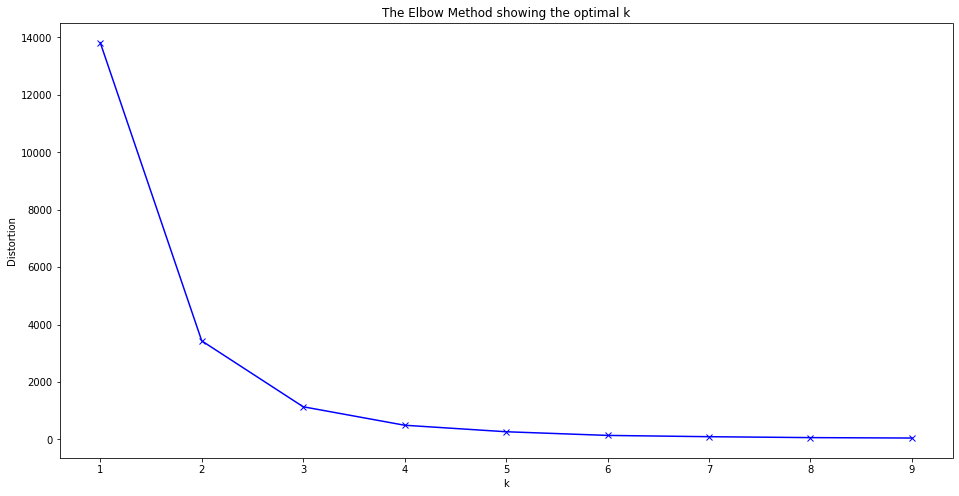

In [406]:
opt_k_elbow = elbow_method(CC_df_std)

In [407]:
print("The optimal K using elbow method: ", opt_k_elbow)

The optimal K using elbow method:  4


>> ### 3.1.2. Applying Kmean Clustering using optimal K



In [408]:
def Kmeans_plot (df, k):
  plt.rcParams['figure.figsize'] =(25,40)
  for num in range(0,17):
      ax = plt.subplot(5,4,num+1)
      col = df.columns[num]
      sns.stripplot(df['constant'],df[col], ax=ax, hue=df['label'])
      plt.xlabel('constant')

  plt.show()

In [409]:
CC_df_k = CC_df.copy()
kmeanModel = KMeans(n_clusters=opt_k_elbow)
kmeanModel.fit_predict(CC_df_std)
labels = kmeanModel.labels_
CC_df_k['clusters'] = labels

In [410]:
CC_df_k

,AMOUNT_OWN,PAYMENT_HISTORY,clusters
975,0.009844,0.058333,2
4807,0.199456,0.000000,0
147,0.030866,0.000000,2
4708,0.060448,0.029167,2
543,0.283534,0.000000,0
...,...,...,...
2895,0.262168,0.000000,0
7813,0.281908,0.000000,0
905,0.238849,0.000000,0
5192,0.131273,0.000000,2


In [411]:
# CC_df_minmax_label = CC_df_minmax.copy()
# Kmeans_plot(CC_df_minmax_label, opt_k_sil)

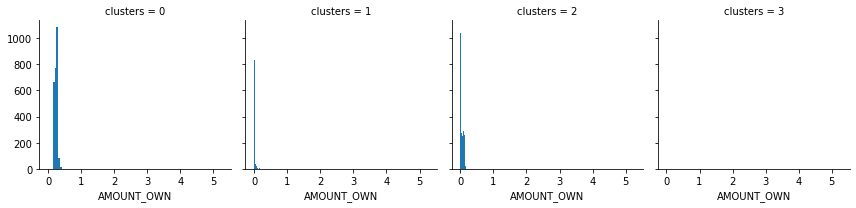

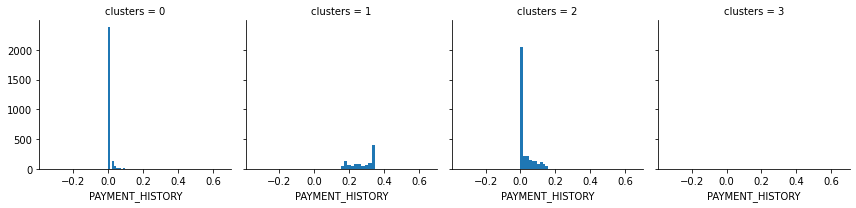

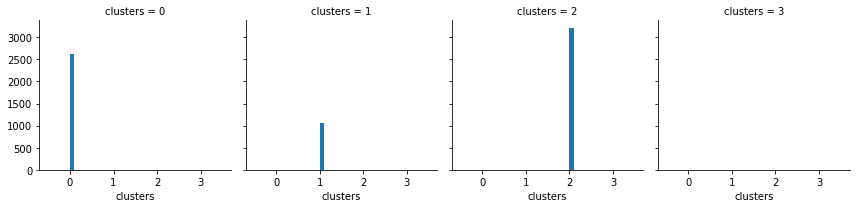

In [412]:
for c in CC_df_k:
    grid= sns.FacetGrid(CC_df_k, col='clusters')
    grid.map(plt.hist, c)

In [413]:
silhouette_score(CC_df_std, CC_df_k['clusters'], metric='euclidean')

0.5946948825273408

>> ### 3.1.3. KMeans Clustering using PCA

In [414]:
CC_df_std_nor = normalize(CC_df_std)
pca = PCA(n_components = 2).fit(CC_df_std_nor)
df_pca  = pca.fit_transform(CC_df_std_nor)

In [415]:
pca_df = pd.DataFrame(df_pca, columns = ["PCA1", "PCA2"])
pca_df


,PCA1,PCA2
0,0.993712,-0.216880
1,-0.880329,0.048518
2,0.531359,-0.667419
3,0.657167,-0.596023
4,-0.891365,0.350771
...,...,...
6903,-0.895874,0.300982
6904,-0.891751,0.347384
6905,-0.897991,0.230193
6906,-0.524716,-0.543541


In [416]:
pca_df.shape
#columns.shape

(6908, 2)

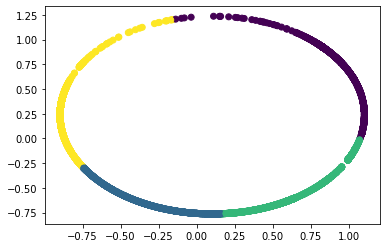

In [417]:
kmeanModel = KMeans(n_clusters=opt_k_elbow)
labels = kmeanModel.fit_predict(pca_df)
plt.scatter(pca_df['PCA1'], pca_df['PCA2'],
            c = labels) 
plt.show()

In [418]:
silhouette_score(pca_df, labels, metric='euclidean')

0.6709091820879243

>> ### 3.1.4. KMeans Clustering using KernelPCA

In [419]:
CC_df_std_nor = normalize(CC_df_std)
Kpca = KernelPCA(n_components = 2, kernel = 'rbf').fit(CC_df_std_nor)
df_Kpca  = Kpca.fit_transform(CC_df_std_nor)

In [420]:
Kpca_df = pd.DataFrame(df_Kpca, columns = ["PCA1", "PCA2"])
Kpca_df


,PCA1,PCA2
0,0.620079,-0.045121
1,-0.610780,0.018009
2,0.447614,-0.477769
3,0.504702,-0.409599
4,-0.628716,0.153862
...,...,...
6903,-0.632018,0.133504
6904,-0.629018,0.152500
6905,-0.632503,0.103264
6906,-0.266518,-0.355216


In [421]:
Kpca_df.shape
#columns.shape

(6908, 2)

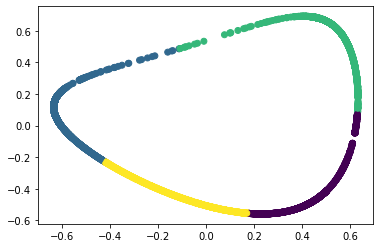

In [422]:
kmeanModel = KMeans(n_clusters=opt_k_elbow)
labels = kmeanModel.fit_predict(Kpca_df)
plt.scatter(Kpca_df['PCA1'], Kpca_df['PCA2'],
            c = labels) 
plt.show()

In [423]:
silhouette_score(Kpca_df, labels, metric='euclidean')

0.7069414471937712

>> ### 3.1.5. KMeans Clustering using TSNE

In [424]:
CC_df_std_nor = normalize(CC_df_std)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
df_tsne = tsne.fit_transform(CC_df_std_nor)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6908 samples in 0.008s...
[t-SNE] Computed neighbors for 6908 samples in 0.100s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6908
[t-SNE] Computed conditional probabilities for sample 2000 / 6908
[t-SNE] Computed conditional probabilities for sample 3000 / 6908
[t-SNE] Computed conditional probabilities for sample 4000 / 6908
[t-SNE] Computed conditional probabilities for sample 5000 / 6908
[t-SNE] Computed conditional probabilities for sample 6000 / 6908
[t-SNE] Computed conditional probabilities for sample 6908 / 6908
[t-SNE] Mean sigma: 0.002000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.771187
[t-SNE] KL divergence after 300 iterations: 1.387563


In [425]:
tsne_df = pd.DataFrame(df_tsne, columns = ["TSNE1", "TSNE2"])
tsne_df


,TSNE1,TSNE2
0,-14.945552,-5.656172
1,-1.675665,2.936349
2,6.311508,-10.238110
3,-6.144040,0.122466
4,-4.205143,11.762777
...,...,...
6903,6.726366,-14.049254
6904,-3.949289,8.742608
6905,14.663508,-2.146187
6906,5.294258,7.486319


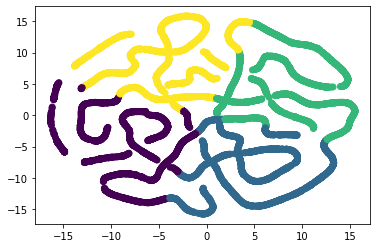

In [432]:
kmeansModel = KMeans(n_clusters=opt_k_elbow)
labels = kmeansModel.fit_predict(tsne_df)
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'],
            c = labels) 
plt.show()

> ## 3.2. KMediods Clustering 

>> ### 3.2.1. Get Optimal number of clustering K

>>> #### 3.2.1.1. Using Silhoutte method to get optimal K



In [433]:
def K_sil_method(df):
  K = range(2,10)
  silhouette_avg = []
  opt_k = 0
  sil_k = {}
  for k in K:
    # initialise kmeans
    kmediodModel = KMedoids(n_clusters=k)
    kmediodModel.fit(df)
    cluster_labels=kmediodModel.labels_
    #print(cluster_labels)
    # silhouette score
    sil_score = silhouette_score(df, cluster_labels)
    silhouette_avg.append(sil_score)
    sil_k[k] = sil_score
  plt.plot(K, silhouette_avg, 'bx-')
  plt.xlabel('Values of K') 
  plt.ylabel('Silhouette score') 
  plt.title('Silhouette analysis For Optimal k')
  plt.show()
  for key, value in sil_k.items(): 
         if max(silhouette_avg) == value: 
             opt_k = key
        
  # choose the optimum K
  return opt_k


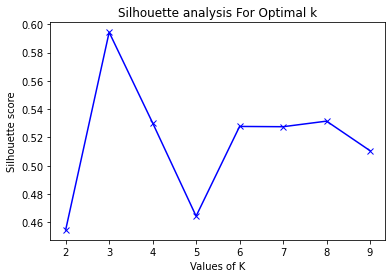

In [434]:
opt_k_sil = K_sil_method(CC_df_std)


In [435]:
print("The optimal K using silhoutte score: ", opt_k_sil)

The optimal K using silhoutte score:  3


In [440]:
def elbow_method(df):
  distortions = []
  K = range(1,10)
  opt_k = 0
  for k in K:
      kmediodModel = KMedoids(n_clusters=k)
      kmediodModel.fit(df)
      cluster_labels=kmediodModel.labels_      
      distortions.append((kmeanModel.inertia_)/k)
  #print(len(distortions)-1)
  for i in range (1, len(distortions)-1):
   # print(i)
    if (distortions[i]-distortions[i+1])/(distortions[i-1]-distortions[i]) > 0.4:
      opt_k = i
   #   print(opt_k)
      break
  #print(distortions)
  plt.figure(figsize=(16,8))
  plt.plot(K, distortions, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Distortion')
  plt.title('The Elbow Method showing the optimal k')
  plt.show()
  return opt_k

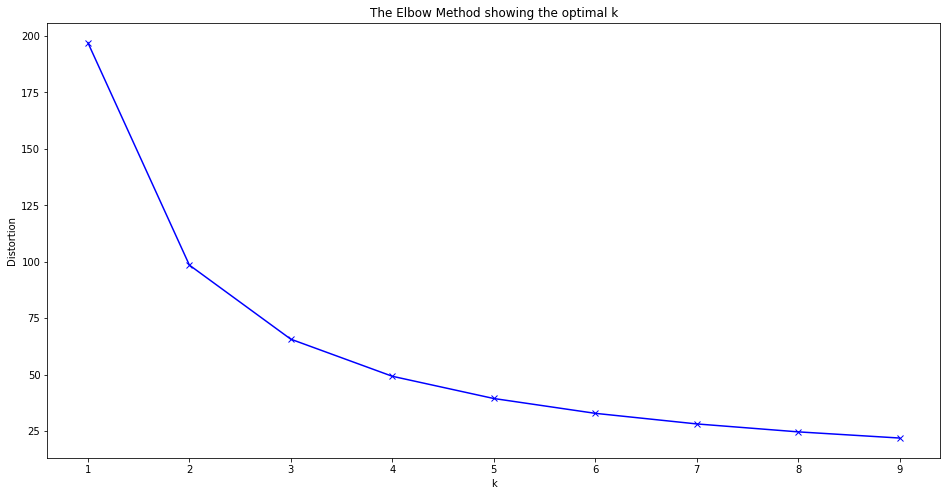

In [441]:
opt_k_elbow = elbow_method(CC_df_std)

In [442]:
print("The optimal K using elbow method: ", opt_k_elbow)

The optimal K using elbow method:  2


>> ### 3.2.2. Applying KMediods Clustering using optimal K

In [ ]:
CC_df_k = CC_df.copy()
kmediodModel = KMedoids(n_clusters=opt_k_elbow)
kmediodModel.fit(CC_df_std)
cluster_labels=kmediodModel.labels_
labels = kmeanModel.labels_
CC_df_k['clusters'] = labels

In [ ]:
CC_df_k

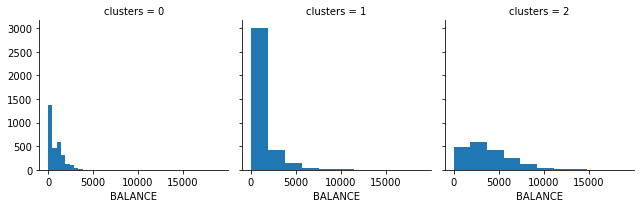

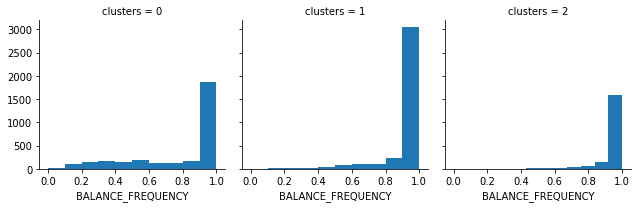

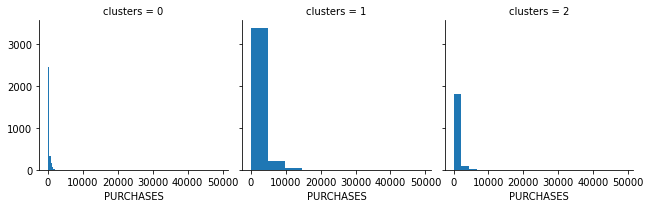

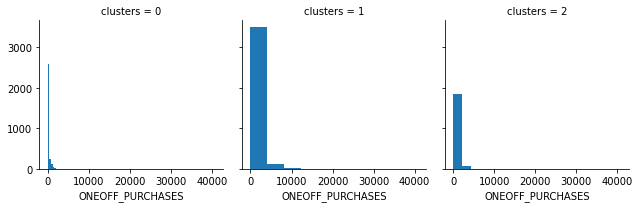

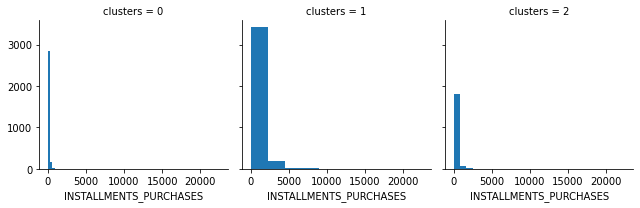

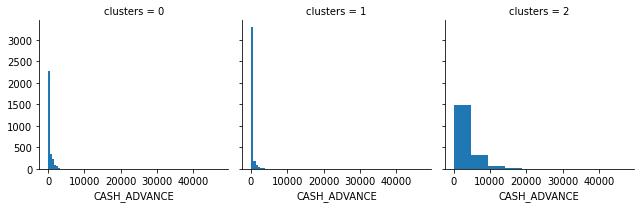

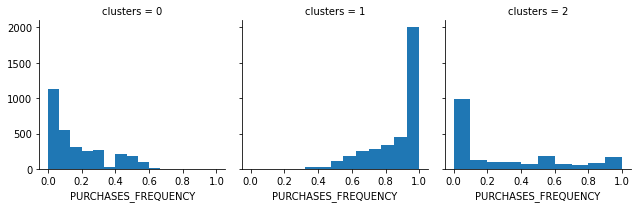

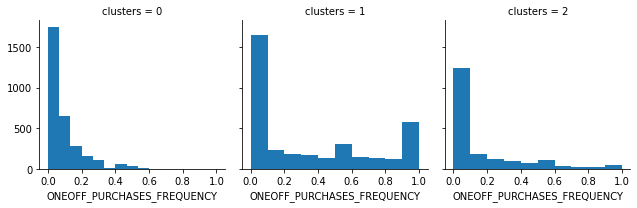

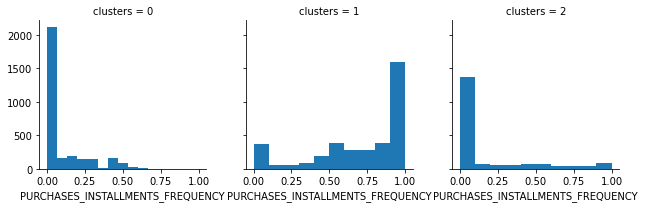

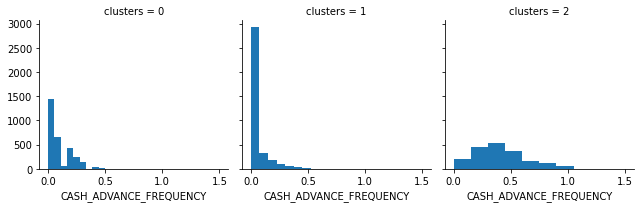

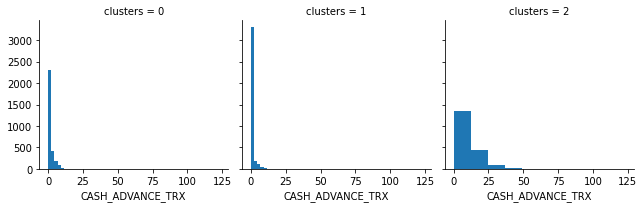

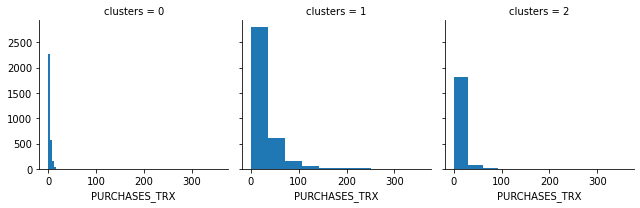

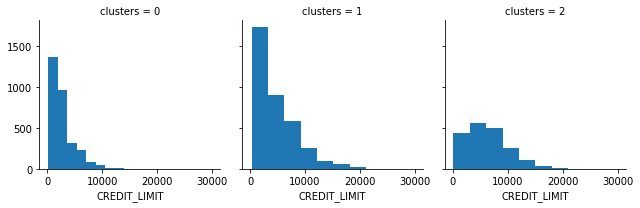

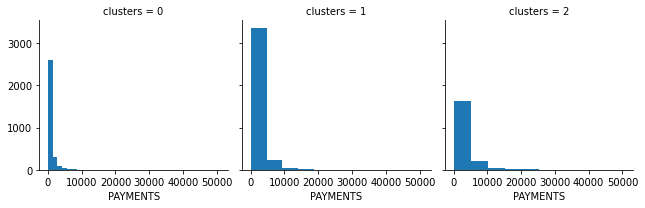

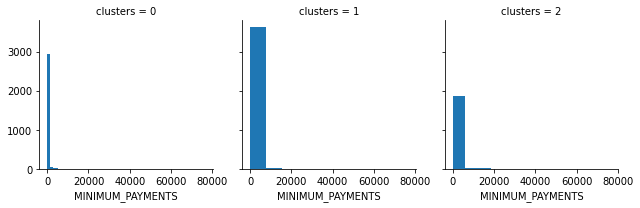

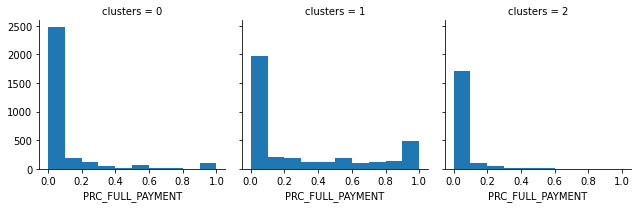

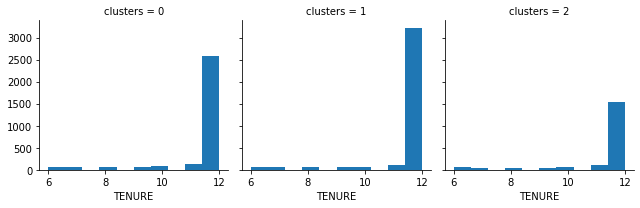

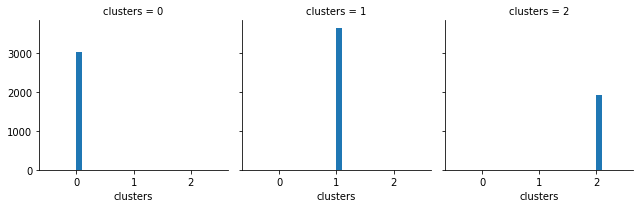

In [ ]:
for c in CC_df_k:
    grid= sns.FacetGrid(CC_df_k, col='clusters')
    grid.map(plt.hist, c)

In [ ]:
silhouette_score(CC_df_std, CC_df_k['clusters'], metric='euclidean')

0.15146192527871521

>> ### 3.2.3. KMediods Clustering using PCA

In [ ]:
CC_df_std_nor = normalize(CC_df_std)
pca = PCA(n_components = 2).fit(CC_df_std_nor)
df_pca  = pca.fit_transform(CC_df_std_nor)

In [ ]:
pca_df = pd.DataFrame(df_pca, columns = ["PCA1", "PCA2"])
pca_df


,PCA1,PCA2
0,-0.481788,-0.692991
1,-0.537375,0.527808
2,0.320760,0.265223
3,-0.562994,-0.503868
4,0.320512,-0.254471
...,...,...
8631,-0.214325,-0.267827
8632,0.320251,-0.195203
8633,0.183536,-0.245043
8634,-0.307306,-0.176105


In [ ]:
pca_df.shape
#columns.shape

(8636, 2)

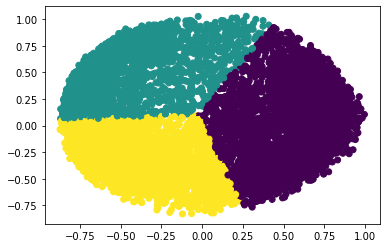

In [ ]:
kmediodModel = KMedoids(n_clusters=opt_k_elbow)
labels = kmediodModel.fit_predict(pca_df)
plt.scatter(pca_df['PCA1'], pca_df['PCA2'],
            c = labels) 
plt.show()

In [ ]:
silhouette_score(pca_df, labels, metric='euclidean')

0.4504935145152485

>> ### 3.2.4. KMediods Clustering using KernelPCA

In [ ]:
CC_df_std_nor = normalize(CC_df_std)
Kpca = KernelPCA(n_components = 2, kernel = 'rbf').fit(CC_df_std_nor)
df_Kpca  = Kpca.fit_transform(CC_df_std_nor)

In [ ]:
Kpca_df = pd.DataFrame(df_Kpca, columns = ["PCA1", "PCA2"])
Kpca_df


,PCA1,PCA2
0,-0.158098,-0.226071
1,-0.172392,0.172719
2,0.104427,0.086621
3,-0.185598,-0.164991
4,0.105177,-0.082704
...,...,...
8631,-0.068386,-0.086018
8632,0.104202,-0.062359
8633,0.060031,-0.078151
8634,-0.098268,-0.055736


In [ ]:
Kpca_df.shape
#columns.shape

(8636, 2)

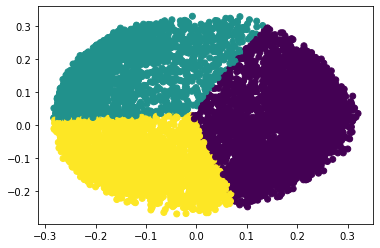

In [ ]:
kmediodModel = KMedoids(n_clusters=opt_k_elbow)
labels = kmediodModel.fit_predict(Kpca_df)
plt.scatter(Kpca_df['PCA1'], Kpca_df['PCA2'],
            c = labels) 
plt.show()

In [ ]:
silhouette_score(Kpca_df, labels, metric='euclidean')

0.451372957612939

>> ### 3.1.5. KMediods Clustering using TSNE

In [ ]:
CC_df_std_nor = normalize(CC_df_std)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
df_tsne = tsne.fit_transform(CC_df_std_nor)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8636 samples in 0.000s...
[t-SNE] Computed neighbors for 8636 samples in 1.942s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8636
[t-SNE] Computed conditional probabilities for sample 2000 / 8636
[t-SNE] Computed conditional probabilities for sample 3000 / 8636
[t-SNE] Computed conditional probabilities for sample 4000 / 8636
[t-SNE] Computed conditional probabilities for sample 5000 / 8636
[t-SNE] Computed conditional probabilities for sample 6000 / 8636
[t-SNE] Computed conditional probabilities for sample 7000 / 8636
[t-SNE] Computed conditional probabilities for sample 8000 / 8636
[t-SNE] Computed conditional probabilities for sample 8636 / 8636
[t-SNE] Mean sigma: 0.161981
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.978790
[t-SNE] KL divergence after 300 iterations: 2.421181


In [ ]:
tsne_df = pd.DataFrame(df_tsne, columns = ["TSNE1", "TSNE2"])
tsne_df


,TSNE1,TSNE2
0,2.470503,3.961300
1,-1.296013,4.869562
2,0.162464,-0.898593
3,-7.990682,-3.982497
4,-2.679890,-8.914809
...,...,...
8631,3.996859,9.180352
8632,8.300158,7.254403
8633,7.490649,7.627518
8634,2.345029,10.556466


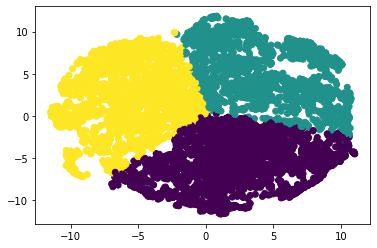

In [ ]:
kMediodModel = KMedoids(n_clusters=3)
labels = kMediodModel.fit_predict(tsne_df)
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'],
            c = labels) 
plt.show()

In [ ]:
silhouette_score(tsne_df, labels, metric='euclidean')

> ## 3.3. Hierarchical methods

>> ### 3.3.1. Choosing metric and method using pdist

In [ ]:
links = ['ward', 'complete', 'average', 'single', 'weighted', 'centroid', 'median']
metrics = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation',
        'cosine', 'dice', 'euclidean', 'hamming', 'jaccard',
        'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto',
        'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean']

In [ ]:
columns = CC_df_std.columns
met_lin = {}
for metric in metrics:
  for link in links:
    if link == 'ward' and metric != 'euclidean':
            pass
    elif link == 'centroid' and metric != 'euclidean':
        pass
    elif link == 'median' and metric != 'euclidean':
        pass
    else:
      Z = shc.linkage(CC_df_std[columns], metric = metric, method = link)
      c, cop_dist = shc.cophenet(Z, distance.pdist(CC_df_std[columns]))
      if c > 0.8:
        key = metric + " + " + link
        met_lin [key] = c
        print("Metric: "+metric + " and Link: "+link+ " correlation score: "+str(c))


Metric: chebyshev and Link: complete correlation score: 0.8292055097753697
Metric: chebyshev and Link: average correlation score: 0.8704793472940504
Metric: chebyshev and Link: single correlation score: 0.8448357374035694
Metric: chebyshev and Link: weighted correlation score: 0.8052587349459928
Metric: cityblock and Link: average correlation score: 0.8305781964840179


/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:1699: RuntimeWarning: invalid value encountered in double_scalars
  c = numerator.sum() / np.sqrt((denomA.sum() * denomB.sum()))


Metric: euclidean and Link: complete correlation score: 0.8201186937921817
Metric: euclidean and Link: average correlation score: 0.8810566943599851
Metric: euclidean and Link: single correlation score: 0.8439715406337083
Metric: euclidean and Link: centroid correlation score: 0.8732883923310477
Metric: minkowski and Link: complete correlation score: 0.8201186937921817
Metric: minkowski and Link: average correlation score: 0.881056694359985
Metric: minkowski and Link: single correlation score: 0.8439715406337082
Metric: seuclidean and Link: complete correlation score: 0.820118693792184
Metric: seuclidean and Link: average correlation score: 0.881056694359987
Metric: seuclidean and Link: single correlation score: 0.8439715406337124
Metric: sqeuclidean and Link: average correlation score: 0.8037717787416976


In [ ]:
max(met_lin.values())
met_lin.values()

dict_values([0.8292055097753697, 0.8704793472940504, 0.8448357374035694, 0.8052587349459928, 0.8305781964840179, 0.8201186937921817, 0.8810566943599851, 0.8439715406337083, 0.8732883923310477, 0.8201186937921817, 0.881056694359985, 0.8439715406337082, 0.820118693792184, 0.881056694359987, 0.8439715406337124, 0.8037717787416976])

In [ ]:
for key, value in met_lin.items(): 
    if  value == max(met_lin.values()): 
        bestMethod=key
        break 
print("Best Method is:" + key + " with score: "+str(value))

Best Method is:seuclidean + average with score: 0.881056694359987


>> ### 3.3.2. Choosing optimal K

>>> #### 3.3.2.1. Choosing number of clusters using Dendrogram 

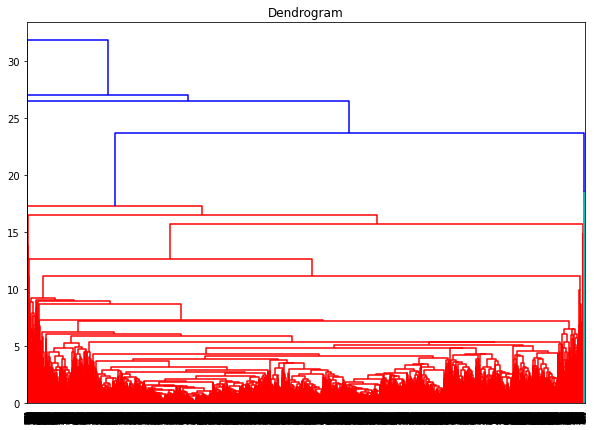

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(y=CC_df_std , method='average', metric='euclidean')) 

>>> #### 3.3.2.2. Choosing number of clusters using Silhoutte score

In [ ]:
def K_sil_agg_method(df):
  K = range(2,10)
  silhouette_avg = []
  opt_k = 0
  sil_k = {}
  for k in K:
    # initialize agg clustering 
    AggClusterModel = AgglomerativeClustering(n_clusters=k)
    AggClusterModel.fit(df)
    cluster_labels=AggClusterModel.labels_
    #print(cluster_labels)
    # silhouette score
    sil_score = silhouette_score(df, cluster_labels)
    silhouette_avg.append(sil_score)
    if k != 2:
      sil_k[k] = sil_score
  plt.plot(K, silhouette_avg, 'bx-')
  plt.xlabel('Values of K') 
  plt.ylabel('Silhouette score') 
  plt.title('Silhouette analysis For Optimal k')
  plt.show()
  for key, value in sil_k.items(): 
   #print(key)
    if value == max(sil_k.values()): 
        opt_k = key
  #print(sil_k)
  # choose the optimum K
  return opt_k


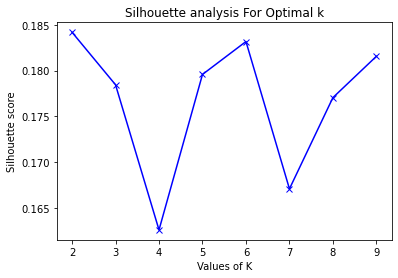

In [ ]:
opt_agg_k = K_sil_agg_method(CC_df_std)

In [ ]:
print("Optimal  number of clustering using sil score is: ", opt_agg_k)

Optimal  number of clustering using sil score is:  6


> ### 3.3.2. Applyin AggloAgglomerativeClustering with optimal K = 6, method = average and metric = eculidean 

In [ ]:
CC_df_agg = CC_df.copy()
AggClusterModel = AgglomerativeClustering(n_clusters=opt_agg_k, affinity = 'euclidean', linkage = 'average')
AggClusterModel.fit(CC_df_std)
cluster_labels=AggClusterModel.labels_
CC_df_agg['clusters'] = cluster_labels

In [ ]:
CC_df_agg

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,1
8632,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8633,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8634,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [ ]:
silhouette_score(CC_df_std, CC_df_agg['clusters'], metric='euclidean')

0.7803420960043396

In [ ]:
CC_df_agg = CC_df.copy()
AggClusterModel = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'average')
AggClusterModel.fit(CC_df_std)
cluster_labels=AggClusterModel.labels_
CC_df_agg['clusters'] = cluster_labels

In [ ]:
CC_df_agg

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,1
8632,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8633,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8634,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [ ]:
silhouette_score(CC_df_std, CC_df_agg['clusters'], metric='euclidean')

0.7803420960043396

In [ ]:
CC_df_agg = CC_df.copy()
AggClusterModel = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')
AggClusterModel.fit(CC_df_std)
cluster_labels=AggClusterModel.labels_
CC_df_agg['clusters'] = cluster_labels

In [ ]:
CC_df_agg

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,0
8632,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8633,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8634,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [ ]:
silhouette_score(CC_df_std, CC_df_agg['clusters'], metric='euclidean')

0.8047854548225128

> ## 3.4. DBSCAN

>> ### 3.4.1. Choosing eps range using Nearest Neighbour

In [ ]:
def NN_eps (df):
  NN_model = NearestNeighbors(n_neighbors=2).fit(df)
  distances, indices = NN_model.kneighbors(df)
  distances = np.sort(distances, axis=0)
  distances = distances[:,1]
  plt.figure(figsize=(20,10))
  plt.plot(distances)
  plt.title('K-distance Graph',fontsize=20)
  plt.xlabel('Data Points sorted by distance',fontsize=14)
  plt.ylabel('Epsilon',fontsize=14)
  plt.show()


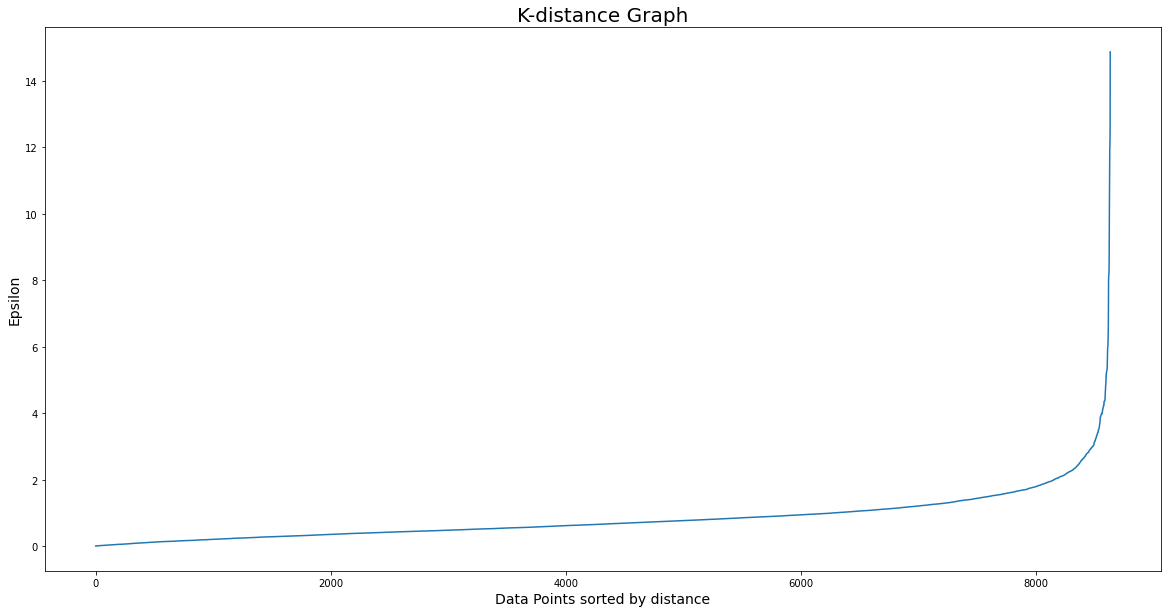

In [ ]:
NN_eps(CC_df_std)

from the graph we can conculde that most of points (almost 8000) is under eps distance of 2

In [ ]:
eps_range = np.arange(0.1, 2, 0.2)


>> ### 3.4.2. Choosing eps and minPoints

In [ ]:
def eps_minPoint(df, eps_range):
  silhouette_avg = []
  sil_eps_p = {}
  for eps in eps_range:
    for minPoints in range (3, 10): # minPoint at least  = 3
      dbscan_model = DBSCAN(eps = eps, min_samples = minPoints).fit(df)
      cluster_labels=dbscan_model.labels_
      sil_score = silhouette_score(df, cluster_labels)
      silhouette_avg.append(sil_score)
      key = str(eps) +" and "+ str(minPoints)
      sil_eps_p[key] = sil_score
      print("Eps: "+str(eps)+", minPoints: "+str(minPoints) + ", Score: " +str(sil_score)+ ", number of clusters: ", str(len(set(dbscan_model.labels_))))
  for key, value in sil_eps_p.items(): 
    if value == max(silhouette_avg): 
        print ("Optimum eps and minPoints: ", key)

In [ ]:
eps_minPoint(CC_df_std, eps_range)

Eps: 0.1, minPoints: 3, Score: -0.4689633985711107, number of clusters:  42
Eps: 0.1, minPoints: 4, Score: -0.4195692899675594, number of clusters:  23
Eps: 0.1, minPoints: 5, Score: -0.3737304348974619, number of clusters:  12
Eps: 0.1, minPoints: 6, Score: -0.2750774407861322, number of clusters:  6
Eps: 0.1, minPoints: 7, Score: -0.25366918294691654, number of clusters:  4
Eps: 0.1, minPoints: 8, Score: -0.25090328181425725, number of clusters:  3
Eps: 0.1, minPoints: 9, Score: -0.25124562443919085, number of clusters:  3
Eps: 0.30000000000000004, minPoints: 3, Score: -0.47800400639962526, number of clusters:  111
Eps: 0.30000000000000004, minPoints: 4, Score: -0.42545050596702805, number of clusters:  50
Eps: 0.30000000000000004, minPoints: 5, Score: -0.4187151511195021, number of clusters:  39
Eps: 0.30000000000000004, minPoints: 6, Score: -0.4257845119771976, number of clusters:  32
Eps: 0.30000000000000004, minPoints: 7, Score: -0.412799048354344, number of clusters:  22
Eps: 0.

>> ### 3.4.3. Applying DBSCAN

In [ ]:
CC_df_dbscan = CC_df.copy()
eps = 1.9
minPoints = 5
dbscan_model = DBSCAN(eps = eps, min_samples = minPoints).fit(CC_df_std)
DBSCAN_labels=dbscan_model.labels_
CC_df_dbscan['clusters'] = DBSCAN_labels

In [ ]:
silhouette_score(CC_df_std, DBSCAN_labels)


0.4587942262610554

# 4. Anomaly Detection 


> ## 4.1. Using DBSCAN

In [ ]:
anomaly_df = CC_df[DBSCAN_labels==-1]


In [ ]:
anomaly_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.00,12
20,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.00,12
22,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.00,12
29,12136.219960,1.000000,3038.01,1013.20,2024.81,3183.583301,1.000000,0.166667,1.000000,0.500000,10,64,13000.0,4230.323491,3292.015030,0.00,12
33,3517.101616,0.727273,547.28,0.00,547.28,0.000000,1.000000,0.000000,1.000000,0.000000,0,14,11000.0,8735.607835,17862.558310,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8554,1382.936306,0.875000,336.00,0.00,336.00,4158.990631,0.875000,0.000000,0.750000,0.125000,5,7,4000.0,754.256439,681.059427,0.60,8
8588,328.686581,1.000000,2806.78,2588.53,218.25,0.000000,0.857143,0.714286,0.285714,0.000000,0,26,1200.0,1796.886852,93.017466,0.25,7
8605,181.891981,0.500000,0.00,0.00,0.00,1865.191764,0.000000,0.000000,0.000000,0.500000,10,0,2000.0,4565.356495,88.057892,1.00,6
8613,486.661842,0.833333,1898.88,939.09,959.79,0.000000,0.833333,0.666667,0.666667,0.000000,0,24,1200.0,669.039640,336.880119,0.50,6


> ## 4.2. Using EM

In [ ]:
GmmModel = GaussianMixture(n_components = 2, covariance_type = 'spherical', max_iter = 300, verbose = 1, tol = 0.00001)
GmmModel.fit(CC_df_std)

Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged: True


GaussianMixture(covariance_type='spherical', max_iter=300, n_components=2,
                tol=1e-05, verbose=1)

In [ ]:
CC_df_Gmm = CC_df.copy()
Gmmlabels = GmmModel.predict(CC_df_std)
Gmmscore = GmmModel.score_samples(CC_df_std)
CC_df_Gmm['labels'] = Gmmlabels
#CC_df_Gmm['scores'] = Gmmscore
CC_df_Gmm

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,labels
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,0
8632,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8633,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8634,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [ ]:
Gmmscore.shape

(8636,)

In [ ]:
thresh = np.quantile(Gmmscore, 0.03)
print(thresh) 

-35.426247704394115


In [ ]:
outlier_df = CC_df_Gmm[Gmmscore<thresh]
outlier_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,labels
33,3517.101616,0.727273,547.28,0.00,547.28,0.000000,1.000000,0.000000,1.000000,0.000000,0,14,11000.0,8735.607835,17862.558310,0.000000,12,0
47,4931.331857,1.000000,901.42,646.07,255.35,8530.648614,0.625000,0.375000,0.250000,0.875000,37,9,12000.0,8113.297346,1012.415961,0.000000,8,0
64,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.485760,0.666667,0.500000,0.583333,0.833333,27,33,7000.0,28232.694460,1107.030803,0.454545,12,0
110,14224.115410,1.000000,0.00,0.00,0.00,4614.427403,0.000000,0.000000,0.000000,0.333333,9,0,19000.0,3066.614272,3406.258999,0.000000,12,0
111,2392.917738,1.000000,12462.44,12462.44,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,217,2800.0,11628.715570,2000.990921,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7963,2144.040539,1.000000,0.00,0.00,0.00,14127.466640,0.000000,0.000000,0.000000,0.416667,23,0,3500.0,12571.814660,525.168936,0.300000,12,0
8039,2648.244646,1.000000,0.00,0.00,0.00,10458.978150,0.000000,0.000000,0.000000,1.000000,123,0,4000.0,9818.531412,665.888853,0.000000,12,0
8141,3911.628474,0.875000,0.00,0.00,0.00,11951.903320,0.000000,0.000000,0.000000,0.500000,40,0,7000.0,7918.877416,905.569605,0.166667,8,0
8250,3326.323283,1.000000,8209.77,2218.28,5991.49,0.000000,1.000000,0.416667,1.000000,0.000000,0,130,10000.0,1942.074765,702.905059,0.083333,12,0


> ## 4.3. Using IsolatedForest

In [ ]:
IsoForModel = IsolationForest(n_estimators = 100, max_samples = 'auto', contamination = 0.1, max_features = 1)
IsoForModel.fit(CC_df_std)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.1, max_features=1)

In [ ]:
IsoAnomlabels = IsoForModel.predict(CC_df_std)

In [ ]:
anomaly_df = CC_df[IsoAnomlabels==-1]
anomaly_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.00,12
20,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.00,12
22,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.00,12
29,12136.219960,1.000000,3038.01,1013.20,2024.81,3183.583301,1.000000,0.166667,1.000000,0.500000,10,64,13000.0,4230.323491,3292.015030,0.00,12
33,3517.101616,0.727273,547.28,0.00,547.28,0.000000,1.000000,0.000000,1.000000,0.000000,0,14,11000.0,8735.607835,17862.558310,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8603,376.547421,0.857143,520.00,280.00,240.00,1178.402416,0.857143,0.142857,0.714286,0.714286,9,7,1000.0,929.415656,103.927887,0.20,7
8605,181.891981,0.500000,0.00,0.00,0.00,1865.191764,0.000000,0.000000,0.000000,0.500000,10,0,2000.0,4565.356495,88.057892,1.00,6
8609,11.294184,0.666667,155.00,0.00,155.00,0.000000,0.666667,0.000000,0.500000,0.000000,0,4,1000.0,149.588599,43.341698,0.50,6
8629,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.00,6


# Final Model


using AgglomerativeClustering sith heighest silhoutte score and clusters = 6

In [ ]:
cc_df_test_std = cc_df_test.copy()
columns = cc_df_test_std.columns
features = cc_df_test_std[columns]
cc_df_test_std[columns] = StandardScaler().fit_transform(features.values)

In [ ]:
cc_df_test_label = cc_df_test.copy()
AggClusterModel = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'average')
labels = AggClusterModel.fit_predict(cc_df_test_std)
cc_df_test_label ['cluster'] = labels


In [ ]:
cc_df_test_label

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2263,19.112841,1.000000,504.20,0.00,504.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,20,1000.0,476.370018,130.862225,0.727273,12,1
6255,834.825957,1.000000,0.00,0.00,0.00,1195.000251,0.000000,0.000000,0.000000,0.250000,6,0,1200.0,1392.439311,221.752549,0.100000,12,1
7316,29.466141,0.545455,149.00,149.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1000.0,350.176472,215.215582,0.000000,12,1
2045,226.030380,1.000000,435.08,435.08,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,15,7500.0,3796.014359,180.308803,0.200000,12,1
5253,38.160715,0.545455,340.00,0.00,340.00,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,5000.0,888.221177,146.348596,1.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,1350.286625,1.000000,642.33,642.33,0.00,0.000000,0.500000,0.500000,0.000000,0.000000,0,12,9000.0,323.683167,344.973051,0.000000,12,1
6500,82.902896,0.727273,430.43,0.00,430.43,0.000000,0.500000,0.000000,0.416667,0.000000,0,10,2500.0,315.075002,87.824996,0.083333,12,1
7873,226.306461,0.363636,0.00,0.00,0.00,788.235661,0.000000,0.000000,0.000000,0.166667,3,0,1200.0,184.701045,217.492643,0.000000,12,1
6652,9.153671,0.272727,126.60,0.00,126.60,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,2900.0,134.386353,46.037748,0.000000,12,1


#### Detecting if there are any anomalies

In [ ]:
IsoForModel = IsolationForest(n_estimators = 100, max_samples = 'auto', contamination = 0.1, max_features = 1)
IsoForModel.fit(cc_df_test_std)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.1, max_features=1)

In [ ]:
IsoAnomlabels = IsoForModel.predict(cc_df_test_std)

In [ ]:
anomaly_df = cc_df_test[IsoAnomlabels==-1]
anomaly_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2517,6810.401782,1.000000,635.76,164.32,471.44,3863.405310,0.916667,0.083333,0.916667,0.250000,13,17,10000.0,3161.148768,3781.907645,0.000000,12
1458,3608.548972,0.900000,1664.02,1620.60,43.42,3899.963528,0.500000,0.500000,0.100000,0.300000,5,15,5000.0,1043.772722,1488.313908,0.000000,10
1063,4550.717687,1.000000,2094.99,1357.00,737.99,2392.186586,1.000000,0.500000,1.000000,0.166667,2,23,7600.0,3172.264416,1091.281356,0.000000,12
7998,1410.909779,1.000000,698.88,0.00,698.88,948.848018,1.000000,0.000000,1.000000,0.166667,8,12,1200.0,79.578186,11795.280960,0.083333,12
5440,8894.553534,1.000000,476.84,476.84,0.00,6098.490836,0.166667,0.166667,0.000000,0.583333,16,3,12000.0,2163.376448,2871.461432,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4058,889.090252,1.000000,9751.90,5896.76,3855.14,0.000000,1.000000,1.000000,0.916667,0.000000,0,115,4500.0,8418.403666,206.690230,0.666667,12
4363,7558.010921,1.000000,365.26,188.56,176.70,4738.307540,0.500000,0.083333,0.416667,0.666667,25,9,8000.0,3311.192387,4903.859993,0.000000,12
3909,293.614532,0.857143,839.61,839.61,0.00,2018.794348,0.714286,0.714286,0.000000,0.857143,12,11,3000.0,2585.110269,102.177146,0.500000,7
3732,5000.825577,1.000000,3310.39,3072.89,237.50,2019.865472,0.750000,0.666667,0.333333,0.083333,1,28,7500.0,2633.433636,2412.441231,0.000000,12


#### Graph of 6 segments using PCA

In [ ]:
CC_df_std_nor = normalize(cc_df_test_std)
Kpca = KernelPCA(n_components = 2, kernel = 'rbf').fit(CC_df_std_nor)
df_Kpca  = Kpca.fit_transform(CC_df_std_nor)

In [ ]:
Kpca_df = pd.DataFrame(df_Kpca, columns = ["PCA1", "PCA2"])
Kpca_df


,PCA1,PCA2
0,0.203738,-0.140351
1,-0.261360,-0.028172
2,-0.153387,-0.188982
3,0.113717,0.052342
4,0.058932,-0.140944
...,...,...
1723,-0.009792,0.035608
1724,-0.008211,-0.264078
1725,-0.172870,-0.122585
1726,-0.021398,-0.175693


In [ ]:
Kpca_df.shape
#columns.shape

(1728, 2)

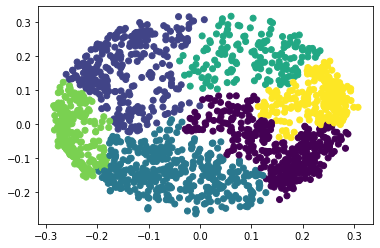

In [ ]:
labels = AggClusterModel.fit_predict(Kpca_df)
plt.scatter(Kpca_df['PCA1'], Kpca_df['PCA2'],
            c = labels) 
plt.show()

>### There are 6 Segements 

>> #### Seg 1

-  Increased balances.
- Average purchases, mainly one-off.
- Low cash advance usage.
- Increased balances compared to their purchases suggest that they tend to carry past balances; this conclusion is also indicated by increased usage of  their limit (balance to credit limit ratio).
- They seem to pay a small amount of their due balance every month, as indicated by the low payments to statement balance ratio. Their ‘‘revolver’’ behavior is also suggested by the fact that they have the lowest percentage of months with full payment of their due balance.

>> #### Seg 2

- Highest cash advance usage in terms of frequency and amount of cash withdrawals.
- Few purchases.
- 85% of their total card spending is attributed to cash advances.
- Highest monthly balance amounts.
- They also present high limit usage.
- they tend to carry past balances and pay only a part of their monthly  balances as indicated by the low frequency of full payments and the similarly low ratio of payments to balance.

>> #### Seg 3


- Highest purchases, in terms of frequency and volume.
- One-off as well as installment purchases.
- Moderate balances and limit usage.
- Their spending is almost exclusively purchases since their cash advance usage is low. 
- Their high payments to balance ratio and frequency of full payments suggest a transactor behavior.

>> #### Seg 4

- Relatively low purchases.
- Their spending is almost exclusively on installments.
- Moderate balances.

>> #### Seg 5

- Lowest purchases and cash advance usage.
- Lowest ratio of balance to credit limit.
- Insignificant (remnant?) balances.

>> #### Seg6

- Increased purchases, including almost exclusively one-off purchases.
- High-value but infrequent purchase transactions: their purchase frequency is
relatively low; however, they have the largest average amount per purchase transaction.
- Moderate balances and credit limit usage.
- They present a transactor behavior.



------

